In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

import ast

In [2]:
df = pd.read_csv("data_science_asia_clean.csv", index_col = 0)
df.head(5)

,Duration,What is your age (# years)?,What is your gender?,In which country do you currently reside?,Are you currently a student?,On which platforms have you begun or completed data science courses?,What products or platforms did you find to be most helpful when you first started studying data science?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Do you use any of the following hosted notebook products?,Do you use any of the following data visualization libraries on a regular basis?,For how many years have you used machine learning methods?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Do you download pre-trained model weights from any of the following services?,Who/what are your favorite media sources that report on data science topics?
1,470,55-59,Man,South Korea,No,('University Courses (resulting in a universit...,"('Kaggle (notebooks, competitions, etc)',)",Master’s degree,1-3 years,"('Python', 'SQL')","(' PyCharm ', ' Jupyter Notebook')","('None',)","(' Matplotlib ', ' Seaborn ')",1-2 years,"(' Scikit-learn ',)","('Linear or Logistic Regression', 'Decision Tr...","('No, I do not download pre-trained model weig...",NaN
2,174,25-29,Woman,China,Yes,"('Kaggle Learn Courses', 'University Courses (...","('University courses', 'Online courses (Course...",Master’s degree,< 1 years,"('Python', 'MATLAB')","(' Visual Studio ', ' MATLAB ', ' Jupyter Note...","('Colab Notebooks', 'Google Cloud Vertex AI Wo...",NaN,NaN,NaN,NaN,NaN,NaN
3,506,25-29,Man,Japan,No,"('Udemy',)","('Online courses (Coursera, EdX, etc)',)",Master’s degree,3-5 years,"('Python',)","(' Visual Studio Code (VSCode) ', ' Jupyter No...","(' Kaggle Notebooks', 'Colab Notebooks')","(' Seaborn ',)",2-3 years,"(' Scikit-learn ', ' PyTorch ', ' Xgboost ', ...","('Decision Trees or Random Forests', 'Dense Ne...","(' Huggingface Models ',)","('Kaggle (notebooks, forums, etc)',)"
4,283,22-24,Woman,China,Yes,('University Courses (resulting in a universit...,"('University courses', 'Social media platforms...",I prefer not to answer,< 1 years,"('Python', 'MATLAB', 'Other')","(' Visual Studio ', ' PyCharm ', ' MATLAB ')","('Google Cloud Vertex AI Workbench ',)","('None',)",Under 1 year,"(' TensorFlow ',)","('None',)","('Other storage services (i.e. google drive)',)","('Other',)"
5,492,40-44,Man,Japan,No,"('Kaggle Learn Courses',)","('Video platforms (YouTube, Twitch, etc)', 'Ka...",No formal education past high school,< 1 years,"('Python',)","(' Notepad++ ', ' Jupyter Notebook')","('None',)","('None',)",I do not use machine learning methods,NaN,NaN,NaN,"('Kaggle (notebooks, forums, etc)',)"


In [3]:
df.shape

(1538, 18)

In [4]:
def convert_to_tuple(value):
    if pd.notna(value):
        return ast.literal_eval(value)
    else:
        return value
for col in df.columns:
    check_value = df[col].iloc[0]
    if (pd.isnull(check_value)):
        i = 1
        while(pd.isnull(check_value)):
            check_value = df[col].iloc[i]
            i += 1
    if isinstance(check_value, str):
        if(check_value[0] == '('):
            df[col] = df[col].apply(convert_to_tuple)
df.head(5)

,Duration,What is your age (# years)?,What is your gender?,In which country do you currently reside?,Are you currently a student?,On which platforms have you begun or completed data science courses?,What products or platforms did you find to be most helpful when you first started studying data science?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Do you use any of the following hosted notebook products?,Do you use any of the following data visualization libraries on a regular basis?,For how many years have you used machine learning methods?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Do you download pre-trained model weights from any of the following services?,Who/what are your favorite media sources that report on data science topics?
1,470,55-59,Man,South Korea,No,(University Courses (resulting in a university...,"(Kaggle (notebooks, competitions, etc),)",Master’s degree,1-3 years,"(Python, SQL)","( PyCharm , Jupyter Notebook)","(None,)","( Matplotlib , Seaborn )",1-2 years,"( Scikit-learn ,)","(Linear or Logistic Regression, Decision Trees...","(No, I do not download pre-trained model weigh...",NaN
2,174,25-29,Woman,China,Yes,"(Kaggle Learn Courses, University Courses (res...","(University courses, Online courses (Coursera,...",Master’s degree,< 1 years,"(Python, MATLAB)","( Visual Studio , MATLAB , Jupyter Notebook)","(Colab Notebooks, Google Cloud Vertex AI Workb...",NaN,NaN,NaN,NaN,NaN,NaN
3,506,25-29,Man,Japan,No,"(Udemy,)","(Online courses (Coursera, EdX, etc),)",Master’s degree,3-5 years,"(Python,)","( Visual Studio Code (VSCode) , Jupyter Noteb...","( Kaggle Notebooks, Colab Notebooks)","( Seaborn ,)",2-3 years,"( Scikit-learn , PyTorch , Xgboost , Light...","(Decision Trees or Random Forests, Dense Neura...","( Huggingface Models ,)","(Kaggle (notebooks, forums, etc),)"
4,283,22-24,Woman,China,Yes,(University Courses (resulting in a university...,"(University courses, Social media platforms (R...",I prefer not to answer,< 1 years,"(Python, MATLAB, Other)","( Visual Studio , PyCharm , MATLAB )","(Google Cloud Vertex AI Workbench ,)","(None,)",Under 1 year,"( TensorFlow ,)","(None,)","(Other storage services (i.e. google drive),)","(Other,)"
5,492,40-44,Man,Japan,No,"(Kaggle Learn Courses,)","(Video platforms (YouTube, Twitch, etc), Kaggl...",No formal education past high school,< 1 years,"(Python,)","( Notepad++ , Jupyter Notebook)","(None,)","(None,)",I do not use machine learning methods,NaN,NaN,NaN,"(Kaggle (notebooks, forums, etc),)"


In [5]:
age = 'What is your age (# years)?'
gender = 'What is your gender'
country = 'In which country do you currently reside?'
education = 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'

## Vẽ phân phối tuổi theo từng khu vực

In [6]:
def age_distribute(ax, country,data):
    data_age = df[age].value_counts().sort_index()
    ax.bar(data.index, data, width=0.55, 
       edgecolor='darkgray', color='#d4dddd',
       linewidth=0.7)
    ax.set_title('Age Distribution of {}'.format(country))
    ax.grid(axis='y', linestyle='-', alpha=0.5)    


In [7]:
age_country = df.groupby([country,age])[age].count()

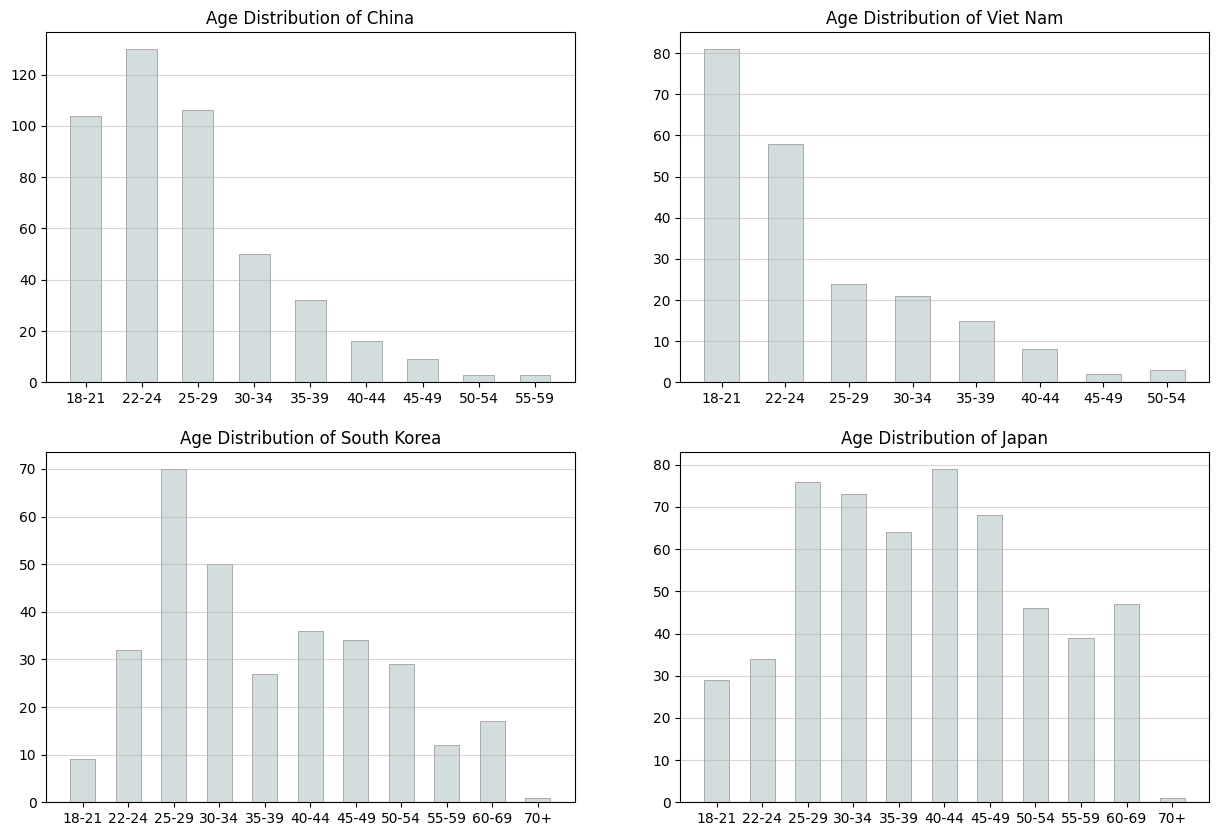

In [8]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
ax_flat = ax.flatten()
age_distribute(ax_flat[0],'China',age_country.loc['China'])
age_distribute(ax_flat[1],'Viet Nam',age_country.loc['Viet Nam'])
age_distribute(ax_flat[2],'South Korea',age_country.loc['South Korea'])
age_distribute(ax_flat[3],'Japan',age_country.loc['Japan'])
plt.show()

- Ta nhận thấy ở Việt Nam và Trung Quốc thì số lượng lao động trẻ rất cao (từ 18 - 24), trong khi đó số lượng lao động có kinh nghiệm với giảm nhanh và ít hơn rất nhiều. Điều này chứng tỏ đây là 2 thị trường khá là mới và tiềm năng của ngành này. Tuy nhiên ở thị trường Việt Nam thì số lượng lao động có kinh nghiệm lại ít hơn khá nhiều nên lo sợ việc chất lượng lao động được đào tạo bài bản không cao.
- Ở Hàn và Nhật thì lại trái ngược lại khi số lượng lao động có kinh nghiệm lại nhiều hơn số lượng lao động trẻ, có thể là do xu hướng già hoá dân số ở hai nước này và có vẻ như ngành DS đã qua thời kì hot ở hai nước này. Tuy nhiên số lượng lao động có kinh nghiệm của họ lại rất nhiều, cho thấy rằng chất lượng nhân sự của họ rất tốt, đây sẽ là hai thị trường tuy không còn hot nhưng chất lượng lại vô cùng tốt.

In [9]:
edu = df.groupby([country,education])[education].count()
edu

In which country do you currently reside?  What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
China                                      Bachelor’s degree                                                                                                   93
                                           Doctoral degree                                                                                                     53
                                           I prefer not to answer                                                                                              38
                                           Master’s degree                                                                                                    187
                                           No formal education past high school                                                                                15
                                   

In [10]:
def pie_pro(ax, country,data):
    sns.set_style("whitegrid")  # Đặt phong cách
    custom_colors = sns.color_palette("Set3", len(data))
    ax.pie(data.values, colors=custom_colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    ax.set_title('Age Distribution of {}'.format(country))

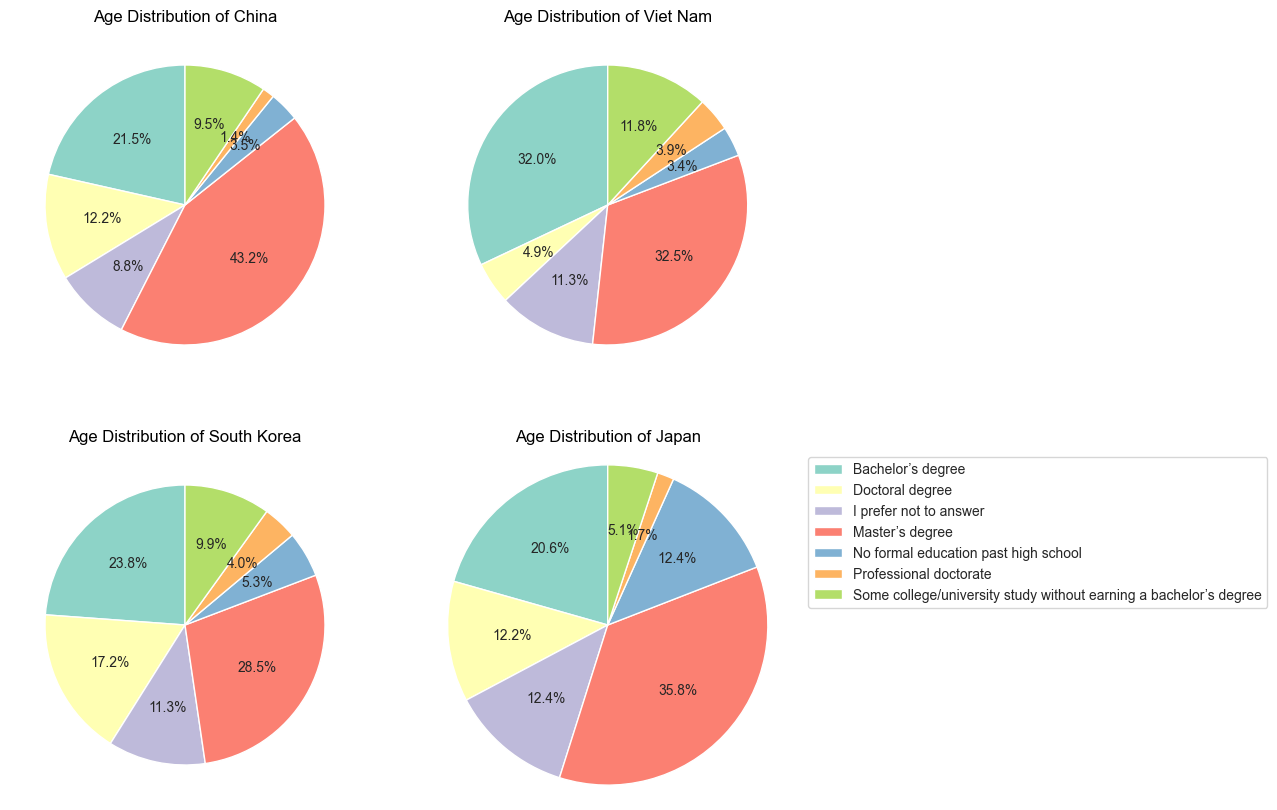

In [11]:
fig, ax = plt.subplots(2,2, figsize=(10, 10))
ax_flat = ax.flatten()
pie_pro(ax_flat[0],'China',edu.loc['China'])
pie_pro(ax_flat[1],'Viet Nam',edu.loc['Viet Nam'])
pie_pro(ax_flat[2],'South Korea',edu.loc['South Korea'])
pie_pro(ax_flat[3],'Japan',edu.loc['Japan'])
plt.legend(edu.loc['China'].index,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Ta nhận thấy rằng dù ở nước nào thì bằng Master đều chiếm phần lớn nhất, chứng tỏ rằng bằng Master là vô cùng quan trọng ở ngành DS. Tuy nhiên bằng tiến sĩ hay giáo sư lại ít hơn nhiều. Chứng tỏ bằng Master là để cho yêu cầu làm việc chứ không nhiều người muốn đi theo hướng nghiên cứu. Nhưng điều này cũng khẳng định rằng nếu bạn muốn làm trong ngành này thì yêu cầu về kiến thức là vô cùng cao.
- Ở Nhật Bản thì tỷ lệ người không học đại học nhưng ra làm ngành này là nhiều hơn hẳn so với 3 nước còn lại. Có thể ở thị trường Nhật Bản thì yêu cầu bằng cấp là không nhiều. Tuy nhiên tỷ lệ bằng Master cao chứng tỏ rằng nếu muốn có một công việc chắc ăn thì bạn cần học ở các cơ sở đào tạo chính quy

<h4><b>Phân tích số lượt bình chọn cho nền tảng/sản phẩm hữu ích để học khoa học dữ liệu ở bốn quốc gia</b></h4>

In [12]:
def create_new_array(fst, scd): 
    return np.append(fst, scd)

new_arr = [(np.array(tuple)) for tuple in df[df.columns[5]]]
platform_arr = new_arr[0]
for i in range(1, len(new_arr)):
    platform_arr = create_new_array(platform_arr, new_arr[i])
unique_platforms =  np.unique(platform_arr, return_counts=False)

In [13]:
vn_df = df[(df[df.columns[3]] == 'Viet Nam')]
jp_df = df[(df[df.columns[3]] == 'Japan')]
cn_df = df[(df[df.columns[3]] == 'China')]
kr_df = df[(df[df.columns[3]] == 'South Korea')]
countries = []

In [14]:
def visualize(df):
    count_list = []
    
    for platform in unique_platforms:
        count = 0
        for tuple in df[df.columns[5]]:
            if platform in tuple:
                count += 1
        count_list.append(count)
    return count_list

vn_count = visualize(vn_df)
cn_count = visualize(cn_df)
jp_count = visualize(jp_df)
kr_count = visualize(kr_df)

unique_platforms[0] = unique_platforms[0][:unique_platforms[0].find(' (')]
unique_platforms[10] = unique_platforms[10][:unique_platforms[10].find(' (')]

# tạo dataframe
count_matrix = np.array([vn_count, cn_count, jp_count, kr_count])
vision_df = pd.DataFrame(count_matrix, columns=unique_platforms)
vision_df.insert(0, "Country", ['Viet Nam', 'China', 'Japan', 'Korea'], False)

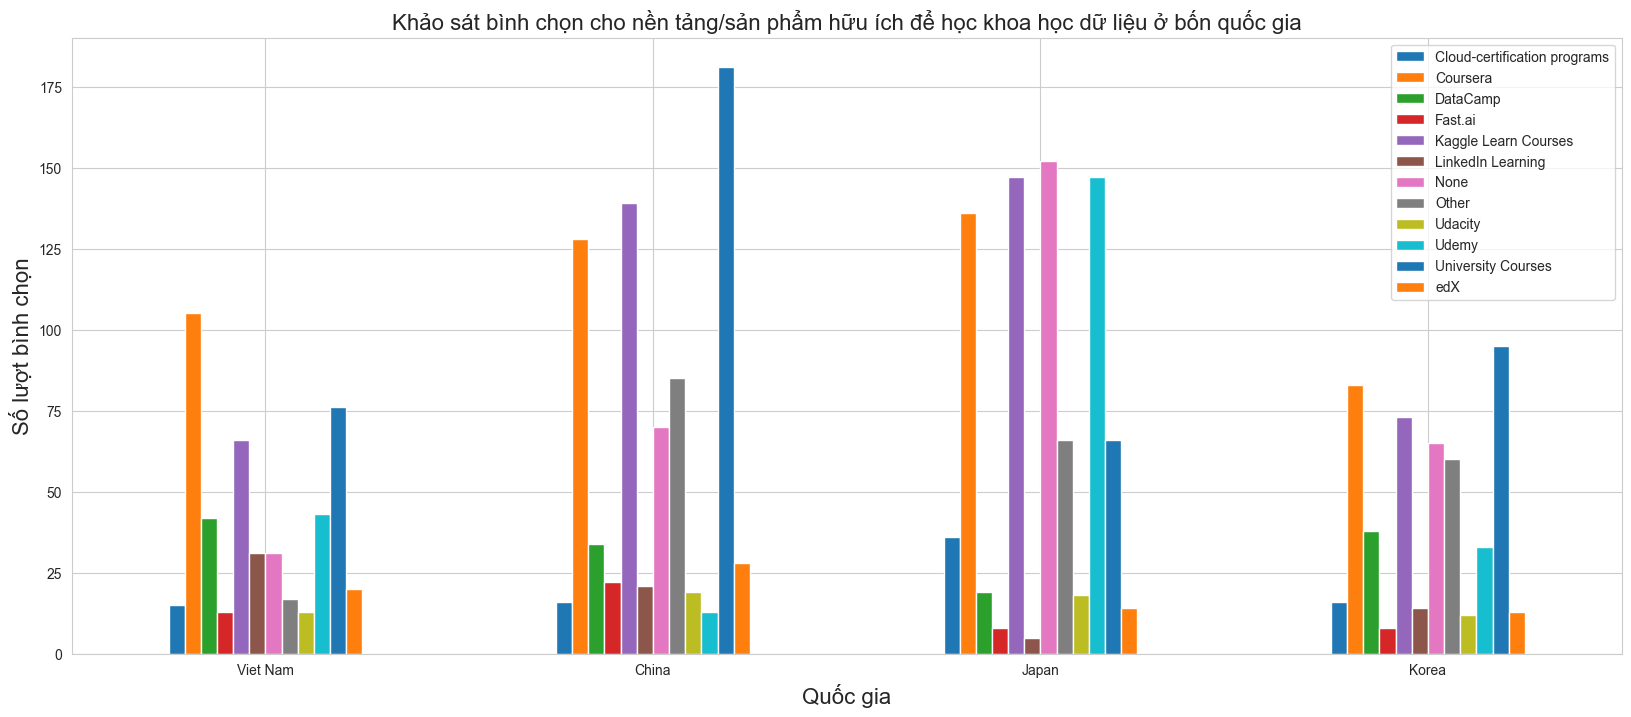

In [15]:
# vẽ biểu đồ
vision_df.plot(x="Country", y=unique_platforms, kind="bar",figsize=(20,8))
plt.xticks(rotation = 'horizontal')
plt.title("Khảo sát bình chọn cho nền tảng/sản phẩm hữu ích để học khoa học dữ liệu ở bốn quốc gia", fontsize=16)
plt.xlabel('Quốc gia', fontsize=16)
plt.ylabel('Số lượt bình chọn', fontsize=16)
plt.rc('font', size=12)
plt.show()

### Nhận xét:
- Nhìn chung, đa số người tham gia khảo sát ở cả 4 quốc gia đều chọn các nền tảng nổi tiếng, uy tín như Coursera, Kaggle Learn Courses, University Courses để học khoa học dữ liệu. Bên cạnh đó, số lượng người chọn "Không" cũng chiếm số lượng khá lớn. Các nền tảng ít được chọn nhất là Fast.ai, Linkedin Learning, Udacity

- Tại Việt Nam, Coursera là nền tảng được nhiều lượt chọn nhất (hơn 100 lượt bình chọn), tiếp đến là học thông qua chương trình đại học (University Courses), sau đó là Udemy, DataCamp. Cloud-certification programs, Fast.ai, Udacity là những nền tảng ít được bình chọn nhất. Có thể thấy, người học khoa học dữ liệu ở Việt Nam vẫn ưu tiên lựa chọn các nền tảng nổi tiếng, uy tín, được nhiều người sử dụng trên thế giới hoặc là phương thức học truyền thống - chương trình đại học để trau dồi kỹ năng của mình.

- Tại Trung Quốc, University Courses là lựa chọn hàng đầu để học khoa học dữ liệu với hơn 180 lượt bình chọn, sau đó là Kaggle Learn Courses, Coursera, tuy nhiên, số lượt bình chọn cho "Không" cũng khá cao. Các nền tảng ít được sử dụng là Cloud-certification programs, Fast.ai, Udemy, Udacity, Linkedin Learning. Có thể thấy tại Trung Quốc, University Courses vẫn là lựa chọn ưu tiên hàng đầu để mọi người học khoa học dữ liệu.

- Tại Nhật bản, số lựa chọn "Không" chiếm số lượng lớn câu trả lời, tiếp đến là các nền tảng online như Kaggle Learn Courses, Udemy, Coursera. Lựa chọn thấp nhất thuộc về Linkedin Learning, Fast.ai, edX. Có thể thấy ở Nhật bản, nhiều người tham gia khảo sát chưa thấy các nền tảng/sản phẩm thật sự hữu ích. Mặt khác, nhiều người đánh giá Kaggle Learn Courses, Udemy, Coursera rất hữu ích và nổi trội hơn hẳn so với các nền tảng còn lại.

- Tại Hàn Quốc, University Courses là lựa chọn hàng đầu để học khoa học dữ liệu, sau đó là Coursera, Kaggle Learn Courses. Các nền tảng ít được sử dụng là Fast.ai, Linkedin Learning, Udacity, edX. Có thể thấy tại Hàn Quốc, University Courses vẫn là lựa chọn ưu tiên hàng đầu để mọi người học khoa học dữ liệu, tiếp đến là các nền tảng online như Coursera, Kaggle Learn Courses. Mặt khác, nhiều người tham gia khảo sát chưa thấy các nền tảng/sản phẩm thật sự hữu ích khi số lượt bình chọn "Không" vẫn khá cao.

<h4><b>Phân tích ngôn ngữ lập trình phổ biển dùng cho học khoa học dữ liệu ở bốn quốc gia</b></h4>

In [16]:
def create_new_array(fst, scd): 
    return np.append(fst, scd)

new_arr = [(np.array(tuple)) for tuple in df[df.columns[9]]]
language_arr = new_arr[0]
for i in range(1, len(new_arr)):
    language_arr = create_new_array(language_arr, new_arr[i])
unique_languages =  np.unique(language_arr, return_counts=False)

# xóa nan
unique_languages = np.delete(unique_languages, np.where(unique_languages == "nan"))

In [17]:
count_list = []
check_for_nan = df[df.columns[9]].isnull()
for language in unique_languages:
    count = 0
    for tuple, is_nan in zip(df[df.columns[9]], check_for_nan):
        if is_nan == False and language in tuple:
            count += 1
    count_list.append(count)

sum_counts = sum(count_list)
language_rate_list = [round((val/sum_counts)*100, 2) for val in count_list]

language_rate_matrix = np.matrix([unique_languages, language_rate_list])
language_rate_matrix = language_rate_matrix.transpose()
language_rate_matrix

language_rate_df = pd.DataFrame(language_rate_matrix, columns=['Programming language', 'Percentage'])
language_rate_df['Percentage'] = language_rate_df['Percentage'].astype(float)
language_rate_df = language_rate_df.sort_values(by=['Percentage'], ascending=True)

C:\Users\KHUONG\AppData\Local\Temp\ipykernel_14804\1262574601.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


Text(0.5, 0, 'Tỷ lệ (%)')

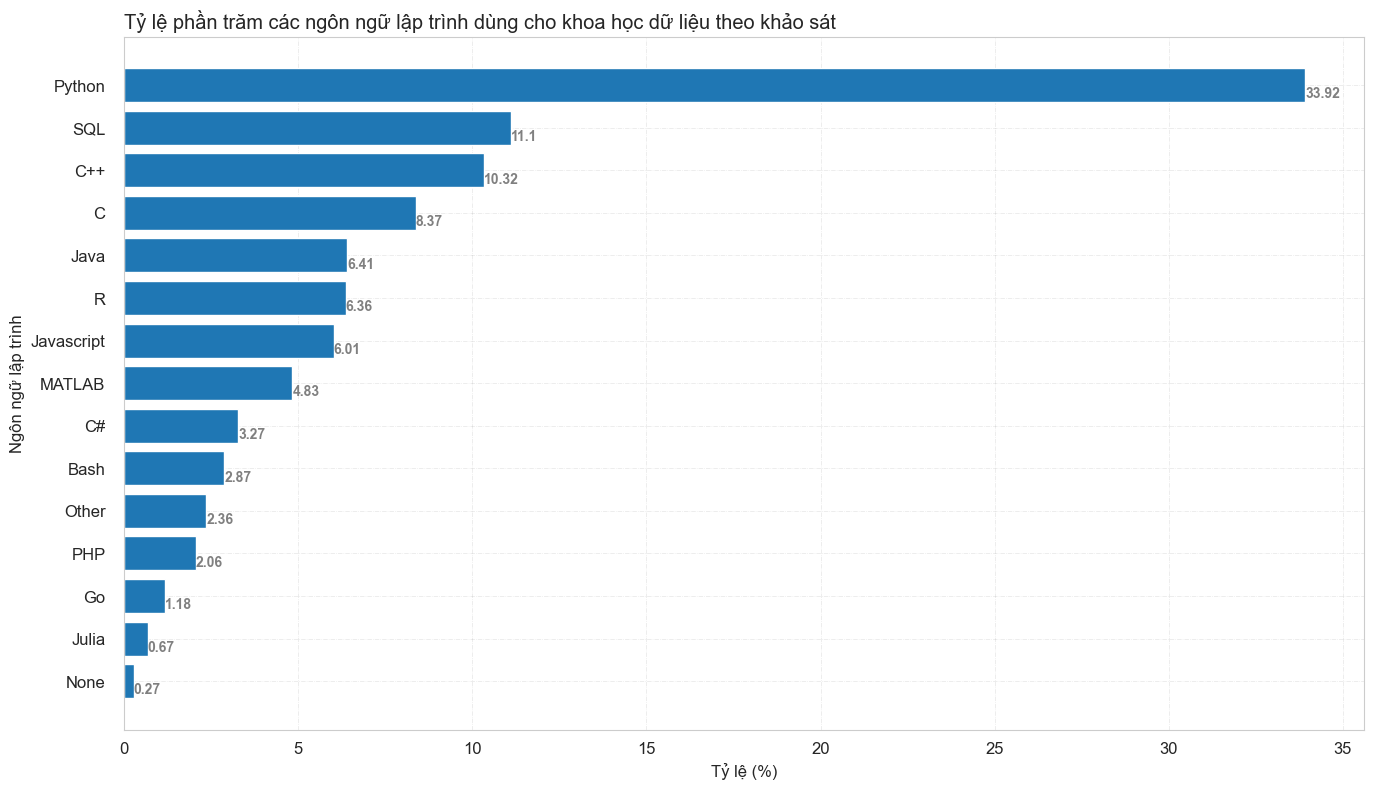

In [18]:
#vẽ biểu đồ
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
language = language_rate_df['Programming language']
percentage = language_rate_df['Percentage']
ax.barh(language, percentage)

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

#  Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y() + 0.1,
             str(i.get_width()),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Tỷ lệ phần trăm các ngôn ngữ lập trình dùng cho khoa học dữ liệu theo khảo sát',
             loc ='left', )
ax.set_ylabel("Ngôn ngữ lập trình")
ax.set_xlabel("Tỷ lệ (%)")

### Nhận xét:
- Nhìn vào biểu đồ, có thể thấy Python là ngôn ngữ lập trình được sử dụng nhiều nhất trong lĩnh vực khoa học dữ liệu ở 4 quốc gia khảo sát với tỷ lệ 33,92%. Đứng thứ hai là SQL với 11,1%, thứ ba là C++ với 10.32%. Các ngôn ngữ lập trình có tỷ lệ sử dụng ít nhất là Julia (0.67%), Go (1.18%), PHP (2.36%).

- Có thể nói Python chiếm tỷ lệ áp đảo là nhờ vào các thư viện được thiết kế cho khoa học dữ liệu như Numpy, Tensorflow, Keras, Scikit-Learn, v.v, giúp mọi giai đoạn phân tích dữ liệu trở nên thuận tiện và dễ dàng hơn. Ngoài ra cú pháp đơn giản, dễ đọc, dễ viết và có tốc độ thực thi nhanh hơn nhiều so với các ngôn ngữ lập trình khác. Python cũng là ngôn ngữ được ưu tiên sử dụng dành cho người mới bắt đầu học khoa học dữ liệu

- SQL là ngôn ngữ cần thiết cho quá trình truy cập cơ sở dữ liệu và thực hiện các thao tác với dữ liệu. SQL giữ vai trò quan trong trong khoa học dữ liệu.

- C++ là ngôn ngữ lập trình đa năng, có thể hỗ trợ làm việc với khối lượng dữ liệu lớn một cách hiệu quả và nhanh chóng.

In [19]:
new_arr = [(np.array(tuple)) for tuple in df[df.columns[15]]]
ML_algo_arr = new_arr[0]
for i in range(1, len(new_arr)):
    ML_algo_arr = create_new_array(ML_algo_arr, new_arr[i])
unique_ML_algos =  np.unique(ML_algo_arr, return_counts=False)

# xóa nan, none
unique_ML_algos = np.delete(unique_ML_algos, np.where(unique_ML_algos == "None"))
unique_ML_algos = np.delete(unique_ML_algos, np.where(unique_ML_algos == "nan"))
unique_ML_algos

unique_ML_exp = ['Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years',
       '5-10 years', '10-20 years']

In [20]:
matrix = []
for ML_algo in unique_ML_algos:
    row = []
    for year_exp in unique_ML_exp:
        tmp_df = df.query("`For how many years have you used machine learning methods?` == @year_exp")
        check_for_nan = tmp_df[tmp_df.columns[15]].isnull()

        total_row = tmp_df[tmp_df.columns[15]].count()
        count = 0
        for data, is_nan in zip(tmp_df[tmp_df.columns[15]], check_for_nan):
            if is_nan == True:
                continue
            if ML_algo in data:
                count += 1
        row.append(count/total_row)
    matrix.append(row)

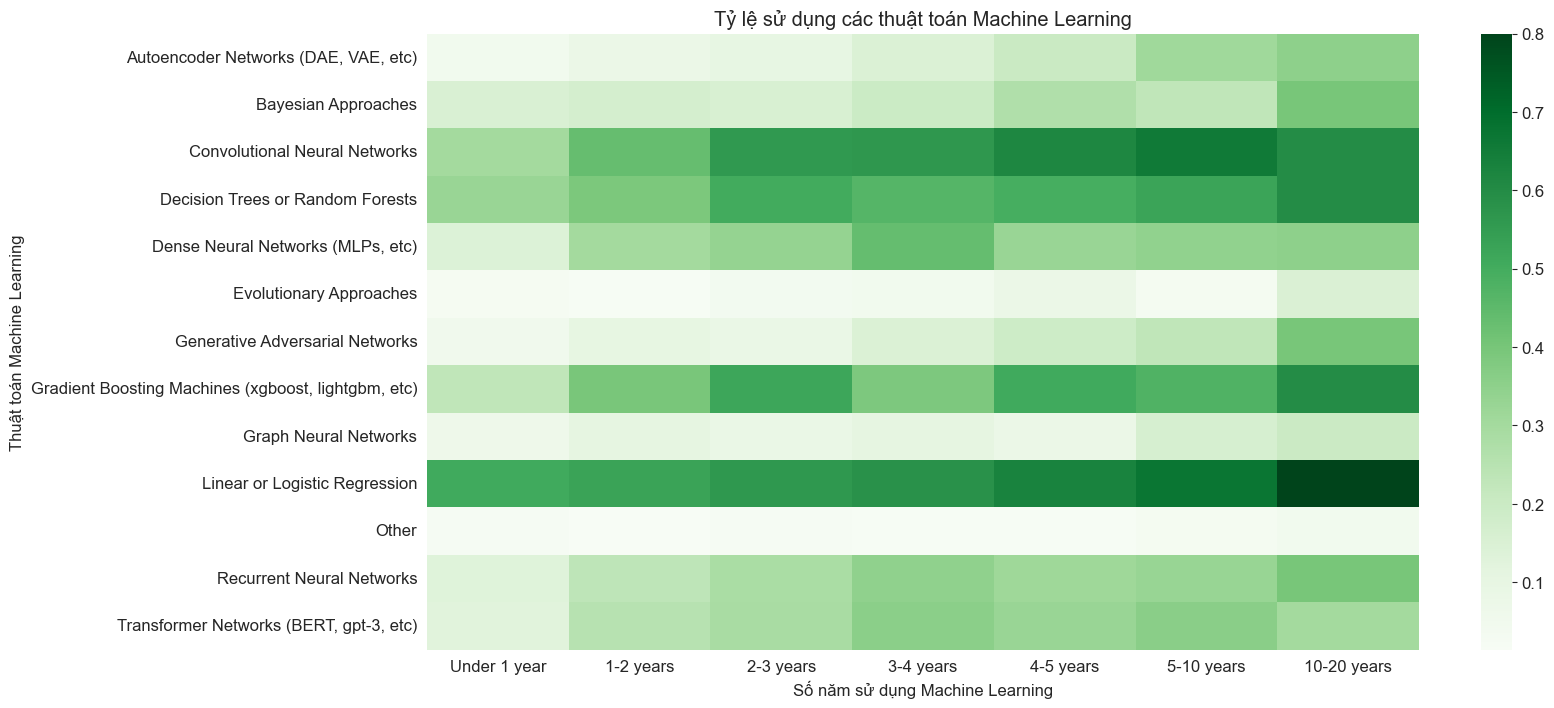

In [21]:
df_visual = pd.DataFrame(matrix,unique_ML_algos , unique_ML_exp)

plt.figure(figsize=(16,8))
sns.heatmap(df_visual, cmap = "Greens")
plt.title("Tỷ lệ sử dụng các thuật toán Machine Learning")
plt.xlabel("Số năm sử dụng Machine Learning")
plt.ylabel("Thuật toán Machine Learning")
plt.rc('font', size=16)
plt.show()

### Nhận xét:
- Nhìn vào biểu đồ, có thể thấy những nhà khoa học dữ liệu càng có nhiều năm kinh nghiệm sử dụng Machine Learning thì tương ứng với đó là khả năng sử dụng/thành thạo nhiều thuật toán Machine Learning hơn những người mới bắt đầu.

- Linear or Logistic Regression, Convolutional Neural Networks, Decision Trees or Random Forests, Gradient Boosting Machines (xgboost, lightgbm, etc) là những thuật toán thường được sử dụng nhiều nhất từ dưới 1 năm kinh nghiệm đến 10-20 năm kinh nghiệm, trong đó Linear ỏ Logistic Regression có tỷ lệ sử dụng cao nhất. Những thuật toán này là những thuật toán cơ bản trong Machine Learning nên có thể dễ dàng sử dụng và mang lại hiệu quả cao ngay từ những năm đầu kinh nghiệm.

- Các thuật toán Autoencoder Networks (DAE, VAE, etc), Evolutionary Approaches, Generative Adversarial Networks, Graph Neural Networks là những thuật toán ít được sử dụng, đặc biệt đối với những người dưới 4 năm kinh nghiệm, tuy nhiên, với những người hơn 4 năm kinh nghiệm, các thuật toán này được sử dụng nhiều hơn. Có thể do các thuật toán này có độ phức tạp cao, đòi hỏi nhiều thời gian nghiên cứu mới có thể sử dụng hiệu quả.

### Phân tích xem những người có trình độ học vấn cao hơn có xu hướng sử dụng những product hoặc nền tảng nào khi bắt đầu học data science
Điều này có thể cung cấp thông tin về sự ưu tiên và lựa chọn của người học tương ứng với trình độ học vấn.

Đầu tiên ta rút dữ liệu từ hai columns cần thông tin và lưu vào `df_1`

In [22]:
df_1 = df[['What products or platforms did you find to be most helpful when you first started studying data science?',"What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"]].dropna()

Ta lấy những trình độ học vấn xuất hiện và lưu vào array

In [23]:
arr_level = df_1["What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"].unique()

Ta lấy dữ liệu theo từng mức trình độ học vấn bao gồm các product và nền tảng lưu vào dict

In [24]:
dict_level_products_platforms= {}
for i in arr_level:
    flattened_values = df_1[df_1["What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"]==i]['What products or platforms did you find to be most helpful when you first started studying data science?'].explode()
    dict_level_products_platforms[i] = flattened_values.value_counts().to_dict()

Ta xoá một số dữ liệu không có ích để việc phân tích hiệu quả hơn

In [25]:
# Delete None values
for library in dict_level_products_platforms:
    del dict_level_products_platforms[library]['None / I do not study data science']
del dict_level_products_platforms['I prefer not to answer']

Sắp xếp lại các trình độ học vấn theo thứ tự từ cao đến thấp

In [26]:
level = ['Doctoral degree',
'Professional doctorate',
'Master’s degree',
'Bachelor’s degree',
'Some college/university study without earning a bachelor’s degree',
'No formal education past high school',
'I prefer not to answer',]

Ta sẽ dùng biểu đồ đường để thấy được sự phân bố và chêch lệch của các nền tảng theo trình độ học vấn đã sắp xếp

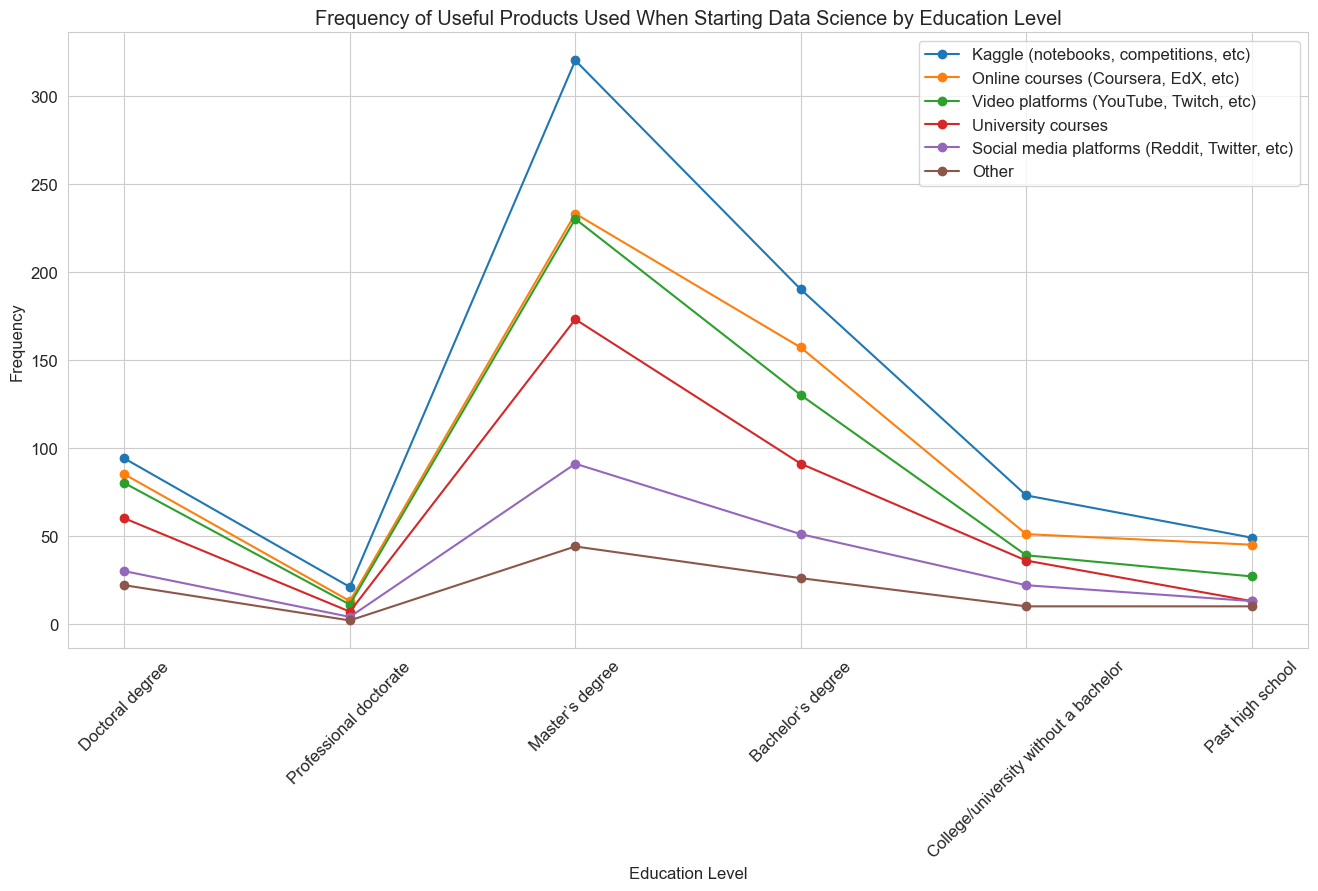

In [27]:
education_levels = ['Doctoral degree',
'Professional doctorate',
'Master’s degree',
'Bachelor’s degree',
'Some college/university study without earning a bachelor’s degree',
'No formal education past high school']
product_frequencies = []
for education_level in education_levels:
    product_frequencies.append(list(dict_level_products_platforms[education_level].values()))

# Vẽ biểu đồ đường
plt.rc('font', size=12)
plt.figure(figsize=(16, 8))

for i in range(len(product_frequencies[0])):
    frequencies = [product[i] for product in product_frequencies]
    plt.plot(education_levels, frequencies, marker='o', label=list(list(dict_level_products_platforms.values())[0].keys())[i])

plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Frequency of Useful Products Used When Starting Data Science by Education Level')
plt.legend()
short_levels = ['Doctoral degree',
'Professional doctorate',
'Master’s degree',
'Bachelor’s degree',
'College/university without a bachelor',
'Past high school']
plt.xticks(education_levels, short_levels, rotation=90)
plt.xticks( rotation=45)
plt.show()

Từ biểu đồ này, ta thấy được dữ chênh lệch giữa trình độ học vấn khi tham gia cuộc khảo sát. Những người tham gia cuộc khảo sát này đa số là **Master’s degree, Bachelor’s degree, Doctoral degree**. Có vẻ những người học nghành Data Science đều cần học vấn khá cao để làm việc (đa số đều từ bậc Bachelor’s degree trở lên) nên rất ích người chưa hoàn thành chương trình đại học.

Các sản phẩm phổ biến nhất cho tất cả các mức trình độ học vấn là "Kaggle (notebooks, competitions, etc)", "Online courses (Coursera, EdX, etc)", và "Video platforms (YouTube, Twitch, etc)". Điều này cho thấy rằng các nguồn tài liệu trực tuyến và các nền tảng học tập trực tuyến có vai trò quan trọng trong việc học Data Science.

Trong mỗi mức trình độ học vấn, có sự chênh lệch trong tần suất sử dụng các nguồn tài liệu học tập. Ví dụ với trình độ là Master’s degree, lượng người dùng Kaggle có sự chêch lệch với các nguồn khác lớn hơn so với các bậc khác. Cho thấy Kaggle là một nguồn tài liệu rất hữu ích với trình độ học vấn này.

### Phân tích xem những framework Machine Learning phổ biến thường được sử dụng với những thuật toán Machine Learning nào. 
Điều này giúp bạn hiểu cách mà người dùng kết hợp các công cụ này trong công việc Machine Learning của họ.

Chọn 2 cột chưa thông tin để xử lý và lưu vào `split_df`

In [28]:
split_df = df[['Which of the following machine learning frameworks do you use on a regular basis?','Which of the following ML algorithms do you use on a regular basis?']].dropna()

Chọn ra những framework Machine Learning phố biến nhất để phân tích. Ở đây, ta sẽ chọn 4 thư viện xuất hiện nhiếu nhất trong cột **Which of the following machine learning frameworks do you use on a regular basis?**

In [29]:
dict_ml_frameworks = split_df['Which of the following machine learning frameworks do you use on a regular basis?'].explode().value_counts().to_dict()
top4_ml_frameworks = list(dict_ml_frameworks.keys())[0:4]

Với từng thư viện phố biến, ta sẽ đếm số lần xuất hiện của các thuật toán Machine Learning sau đó lưu vào `dict_ml_frameworks_algorithms` với key là tên framework và value là dict chứa các thuật toán và số lần xuất hiện của nó.

In [30]:
dict_ml_frameworks_algorithms= {}
for i in top4_ml_frameworks:
    flattened_values = split_df[split_df['Which of the following machine learning frameworks do you use on a regular basis?'].apply(lambda x: any(i in item for item in x))]['Which of the following ML algorithms do you use on a regular basis?'].explode()
    dict_ml_frameworks_algorithms[i] = flattened_values.value_counts().to_dict()

Biểu đồ multiple bar chart này cho phép bạn so sánh sự sử dụng của các kỹ thuật khác nhau trong các thư viện Scikit-learn, PyTorch, TensorFlow và Keras. Ta có thể dễ dàng nhìn thấy mức độ sử dụng của mỗi kỹ thuật trong mỗi thư viện và so sánh chúng với nhau. Vẽ một plot bar chart với trục x là các kỹ thuật và trục y là số lần sử dụng tương ứng. 

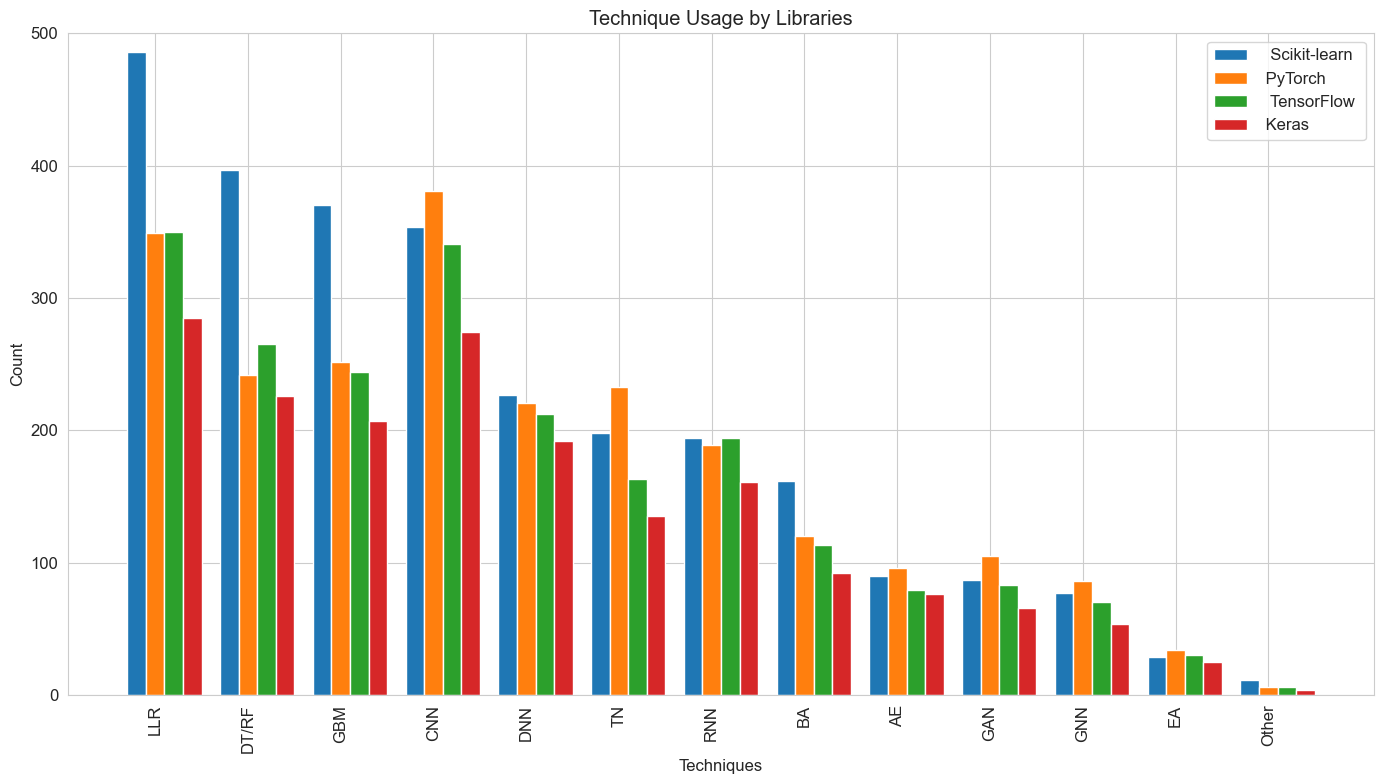

In [31]:
# Mapping of full names to abbreviations
name_to_abbrev = {
    'Convolutional Neural Networks': 'CNN',
    'Linear or Logistic Regression': 'LLR',
    'Decision Trees or Random Forests': 'DT/RF',
    'Gradient Boosting Machines (xgboost, lightgbm, etc)': 'GBM',
    'Dense Neural Networks (MLPs, etc)': 'DNN',
    'Transformer Networks (BERT, gpt-3, etc)': 'TN',
    'Recurrent Neural Networks': 'RNN',
    'Bayesian Approaches': 'BA',
    'Autoencoder Networks (DAE, VAE, etc)': 'AE',
    'Generative Adversarial Networks': 'GAN',
    'Graph Neural Networks': 'GNN',
    'Evolutionary Approaches': 'EA',
    'None': 'None',
    'Other': 'Other'
}

# Delete None values
for library in dict_ml_frameworks_algorithms:
    del dict_ml_frameworks_algorithms[library]['None']

# Extract the techniques and libraries
techniques = list(dict_ml_frameworks_algorithms[list(dict_ml_frameworks_algorithms.keys())[0]].keys())
libraries = list(dict_ml_frameworks_algorithms.keys())

# Set the position of each technique on the x-axis
x = np.arange(len(techniques))

# Set the width and size of the bars
width = 0.2
plt.figure(figsize=(14,8))

# Plotting the bars for each library
plt.bar(x - width, [dict_ml_frameworks_algorithms[libraries[0]][technique] for technique in techniques], width, label=libraries[0])
plt.bar(x, [dict_ml_frameworks_algorithms[libraries[1]][technique] for technique in techniques], width, label=libraries[1])
plt.bar(x + width, [dict_ml_frameworks_algorithms[libraries[2]][technique] for technique in techniques], width, label=libraries[2])
plt.bar(x + 2 * width, [dict_ml_frameworks_algorithms[libraries[3]][technique] for technique in techniques], width, label=libraries[3])

# Customize the x-axis tick labels with abbreviations
abbreviations = [name_to_abbrev[technique] for technique in techniques]
plt.xticks(x, abbreviations, rotation=90)

# Set the title and labels
plt.title('Technique Usage by Libraries')
plt.xlabel('Techniques')
plt.ylabel('Count')
plt.ylim(0, 500)

# Create a legend for the libraries
plt.legend()

plt.tight_layout()
plt.show()

Từ biểu đồ này, chúng ta có thể rút ra một số kết luận về việc sử dụng các thuật toán Machine Learning trong các thư viện Machine Learning và Deep Learning.

Scikit-learn và PyTorch là hai thư viện phổ biến được sử dụng nhiều nhất trong cộng đồng Machine Learning và Deep Learning.

TensorFlow và Keras cũng được sử dụng khá phổ biến, tuy nhiên không đạt được mức độ sử dụng như Scikit-learn và PyTorch.

Tổng quan, Scikit-learn và PyTorch là hai thư viện phổ biến được sử dụng rộng rãi với một loạt các thuật toán học máy khác nhau. TensorFlow và Keras, trong khi không sử dụng nhiều thuật toán truyền thống như DT/RF và GBM, lại tập trung nhiều vào Deep Learning với CNN, DNN và RNN. Trong khi đó, Scikit-learn có sự đa dạng hơn với sự sử dụng của các thuật toán truyền thống và cũng hỗ trợ một số thuật toán Deep Learning.

## Phân tích IDE được sử dụng

In [32]:
# Lấy dữ liệu cột và tính số lượng từng loại IDE
df_IDE = df['Which of the following integrated development environments (IDE\'s) do you use on a regular basis?'].explode().value_counts().to_dict()
# Loại bỏ các hàng dữ liệu có giá trị None
del df_IDE['None']

Text(0.5, 1.0, "Biểu đồ Môi trường phát triển tích hợp (IDE's) được sử dụng thường xuyên")

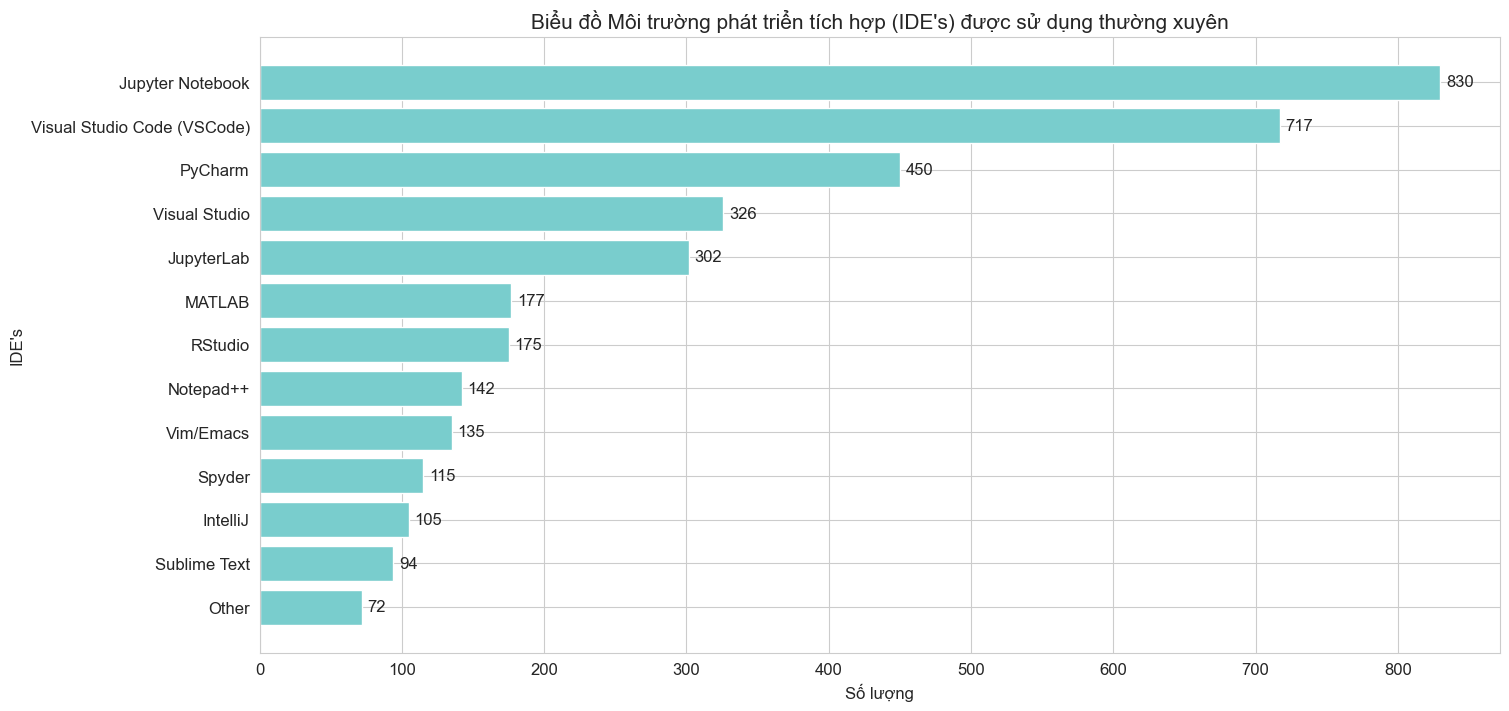

In [33]:
ides = ['Jupyter Notebook',
        'Visual Studio Code (VSCode)',
        'PyCharm','Visual Studio',
        'JupyterLab', 'MATLAB','RStudio',
        'Notepad++','Vim/Emacs','Spyder',
        'IntelliJ','Sublime Text', 'Other']

ides_value = []
for i in df_IDE:
    ides_value.append(df_IDE[i])

# Tạo biểu đồ cột ngang
plt.figure(figsize=(16, 8))
ides_plot = plt.barh(ides, ides_value, color="#79CDCD")

# Đảo ngược trục y để các nền tảng có số người chọn nhiều nhất nằm ở phía trên
ax = plt.gca()
ax.invert_yaxis()
ax.bar_label(ides_plot, padding=4)

# Đặt tên cho trục x, trục y và tên biểu đồ
ax.set_ylabel("IDE\'s")
ax.set_xlabel("Số lượng")
plt.title("Biểu đồ Môi trường phát triển tích hợp (IDE\'s) được sử dụng thường xuyên", loc="center", fontsize=15)


- _Lựa chọn biểu đồ_: Cột ngang (bar chart)  
    - Hiển thị so sánh giữa các nhóm: Biểu đồ cột ngang thường được sử dụng để so sánh các lượng người dùng giữa các ứng dụng IDE khác nhau. Điều này có thể giúp trực quan hóa sự khác biệt và tương quan giữa các ứng dụng.
    - Dễ đọc và so sánh: Biểu đồ cột ngang cho phép người đọc dễ dàng so sánh các giá trị vì chiều ngang của cột có thể đo lường độ dài. Điều này giúp hình dung mức độ khác biệt giữa các giá trị một cách trực quan.
    - Đặt trọng tâm vào giá trị: Trong biểu đồ cột ngang, giá trị của mỗi cột được đặt trên trục ngang, giúp tạo ra một trực quan hóa mạnh mẽ cho dữ liệu.  
    

- _Phân tích_:  
    - Trong biểu đồ trên, Jupyter Notebook và Visual Studio Code (VSCode) là hai môi trường phát triển phổ biến nhất, với số lượng người sử dụng lần lượt là 830 và 717. Điều này cho thấy sự ưa chuộng và độ phổ biến của hai IDE này trong việc phân tích dữ liệu và lập trình. Jupyter Notebook được ưa chuộng vì tính linh hoạt, khả năng tương tác và khả năng chia sẻ mã nguồn một cách dễ dàng, còn VSCode cho thấy tính linh hoạt và khả năng mở rộng của mình đã thu hút sự quan tâm của nhiều lập trình viên.
    - PyCharm, Visual Studio và JupyterLab cũng được sử dụng khá phổ biến, với số lượng người sử dụng lần lượt là 450, 326 và 302. Điều này cũng phần nào phản ánh chất lượng các tính năng, công cụ mà các IDE này hỗ trợ cho lập trình viên.
    - MATLAB, RStudio và Notepad++ cũng có mức độ sử dụng tương đối cao, với số lượng người sử dụng từ 142 đến 177.
    - Các môi trường phát triển như Vim / Emacs, Spyder, IntelliJ và Sublime Text có mức độ sử dụng thấp hơn so với các IDE trên.
    - Các môi trường phát triển khác: Có một số người dùng sử dụng các môi trường phát triển không thuộc danh sách trên, được ghi chung vào nhãn "Other" với số lượng là 72. Điều này cho thấy sự đa dạng trong lựa chọn IDE của người dùng.  
    
Tổng quan, các lựa chọn IDE của người dùng phụ thuộc vào nhiều yếu tố như tính linh hoạt, khả năng mở rộng, tính năng chuyên dụng và yêu cầu công việc cụ thể. Sự đa dạng trong lựa chọn IDE phản ánh sự đa dạng trong phong cách làm việc và ưu tiên của các lập trình viên và nhà phân tích dữ liệu.

## Phân tích thư viện thường được sử dụng 

In [34]:
# Lấy dữ liệu cột và tính số lượng từng thư viện
df_lib = df['Do you use any of the following data visualization libraries on a regular basis?'].explode().value_counts().to_dict()

In [35]:
# Loại bỏ các hàng dữ liệu có giá trị None
del df_lib['None']

Text(0.5, 1.0, 'Biểu đồ Thư viện trực quan hóa dữ liệu được sử dụng thường xuyên')

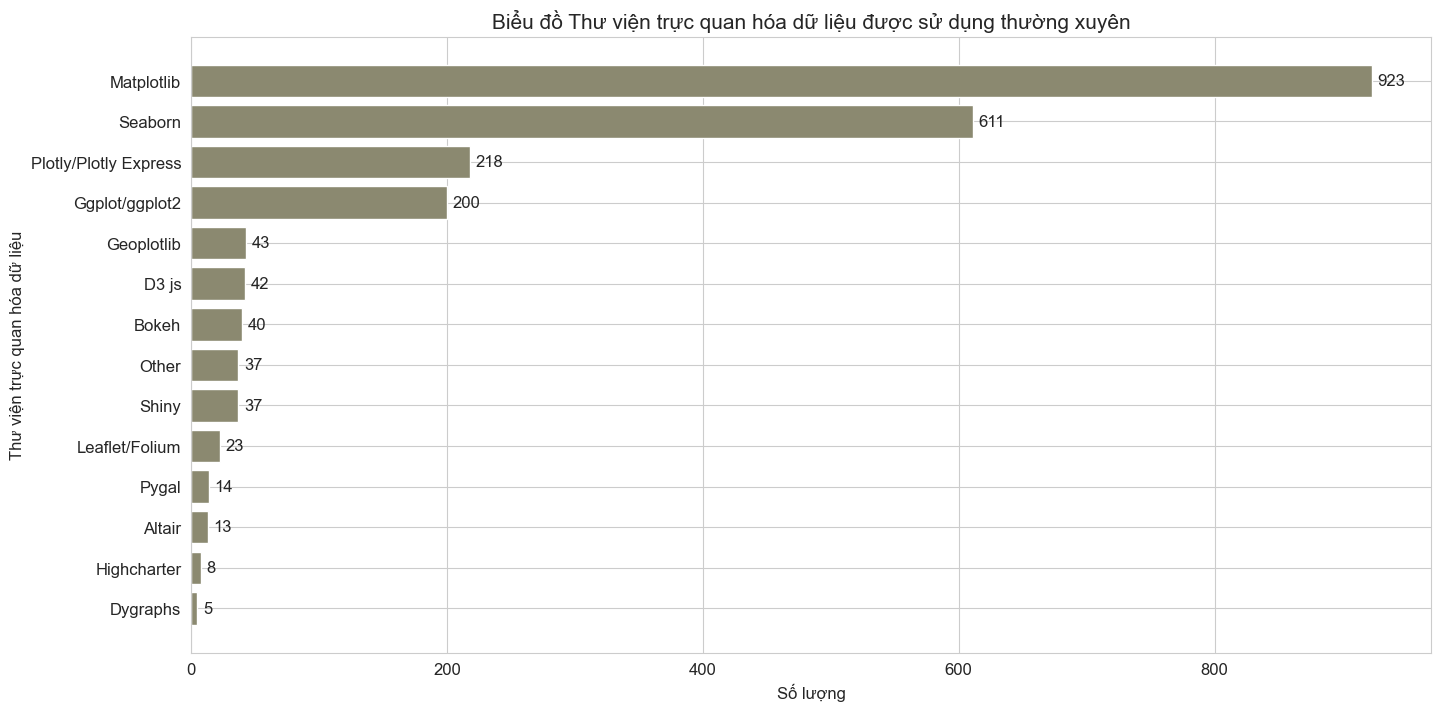

In [36]:
libs = ['Matplotlib',
        'Seaborn',
        'Plotly/Plotly Express',
        'Ggplot/ggplot2',
        'Geoplotlib',
        'D3 js',
        'Bokeh',
        'Other',
        'Shiny',
        'Leaflet/Folium',
        'Pygal',
        'Altair',
        'Highcharter',
        'Dygraphs']

libs_value = []
for i in df_lib:
    libs_value.append(df_lib[i])

# Tạo biểu đồ cột ngang
plt.figure(figsize=(16, 8))
libs_plot = plt.barh(libs, libs_value, color="#8B8970")

# Đảo ngược trục y để các nền tảng có số người chọn nhiều nhất nằm ở phía trên
ax = plt.gca()
ax.invert_yaxis()
ax.bar_label(libs_plot, padding=4)

# Đặt tên cho trục x, trục y và tên biểu đồ

ax.set_ylabel("Thư viện trực quan hóa dữ liệu")
ax.set_xlabel("Số lượng")
plt.title("Biểu đồ Thư viện trực quan hóa dữ liệu được sử dụng thường xuyên", loc="center", fontsize=15)


- _Lựa chọn biểu đồ_: Cột ngang (bar chart)  
    - Hiển thị so sánh giữa các nhóm: Biểu đồ cột ngang giúp so sánh các lượng người dùng giữa các thư viện trực quan hóa khác nhau. Điều này có thể giúp trực quan hóa sự khác biệt và tương quan giữa các nhãn dữ liệu.
    - Dễ đọc và so sánh: Biểu đồ cột ngang cho phép người đọc dễ dàng so sánh các giá trị vì chiều ngang của cột có thể đo lường độ dài. Điều này giúp hình dung mức độ khác biệt giữa các giá trị một cách trực quan.
    - Đặt trọng tâm vào giá trị: Trong biểu đồ cột ngang, giá trị của mỗi cột được đặt trên trục ngang, giúp tạo ra một trực quan hóa mạnh mẽ cho dữ liệu.  
    

- _Phân tích_:  
    - Matplotlib là thư viện phổ biến nhất với 923 lượt đề cập. Matplotlib là một thư viện trực quan hóa dữ liệu đa nền tảng và mạnh mẽ trong Python.

    - Seaborn là thư viện trực quan hóa dữ liệu thứ hai phổ biến nhất với 611 lượt đề cập. Seaborn cung cấp các chức năng cao cấp cho việc trực quan hóa dữ liệu thống kê và có tích hợp tốt với Pandas.

    - Plotly/Plotly Express xếp thứ ba với 218 lượt đề cập. Plotly cung cấp các công cụ mạnh mẽ cho việc tạo ra các đồ thị tương tác và đồ họa web.

    - Ggplot/ggplot2, với 200 lượt đề cập, là một thư viện trực quan hóa dữ liệu phổ biến trong R. Nó dựa trên cú pháp "Grammar of Graphics" để tạo ra các đồ thị chất lượng cao.

    - Các thư viện như Geoplotlib, D3.js, Bokeh, Shiny và Leaflet/Folium cũng được đề cập trong số lần nhưng có số lượng thấp hơn so với các thư viện khác. Chúng được sử dụng chủ yếu cho việc trực quan hóa dữ liệu địa lý và dữ liệu tương tác.

    - Các thư viện Pygal, Altair, Highcharter và Dygraphs cũng được đề cập nhưng có số lượng thấp. Chúng cung cấp các công cụ trực quan hóa dữ liệu đa dạng nhưng ít phổ biến hơn so với các thư viện khác.

Tổng quan, Matplotlib và Seaborn là hai thư viện phổ biến nhất cho trực quan hóa dữ liệu trong Python, trong khi Plotly cung cấp tính năng tương tác cao. Ggplot/ggplot2 là thư viện phổ biến trong R. Sự lựa chọn thư viện trực quan hóa dữ liệu cụ thể phụ thuộc vào yêu cầu của bạn và sự thoải mái với các công cụ cụ thể.

## Phân tích tương quan số năm kinh nghiệm và công cụ IDE thường dùng

In [37]:
# Lọc các hàng có ô IDE giá trị None
df_new = df.dropna(subset=['Which of the following integrated development environments (IDE\'s) do you use on a regular basis?'])
df_new = df_new[df_new["Which of the following integrated development environments (IDE\'s) do you use on a regular basis?"].apply(lambda x: x != ('None',))]

# Lấy ra dữ liệu 2 cột cần thiết
df_exp = df_new[['For how many years have you been writing code and/or programming?', 'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?']]

In [38]:
# Sắp xếp lại theo mốc kinh nghiệm
exp_count = df_exp.explode('Which of the following integrated development environments (IDE\'s) do you use on a regular basis?').value_counts().reset_index(name='Freq')
values_time = ['< 1 years','1-3 years', '3-5 years', '5-10 years', '10-20 years','20+ years']
exp_count['For how many years have you been writing code and/or programming?'] = pd.Categorical(exp_count['For how many years have you been writing code and/or programming?'], categories=values_time, ordered=True)
exp_count = exp_count.sort_values(by='For how many years have you been writing code and/or programming?')

Text(0.5, 1.0, 'Biểu đồ sử dụng Môi trường phát triển tích hợp theo số năm kinh nghiệm')

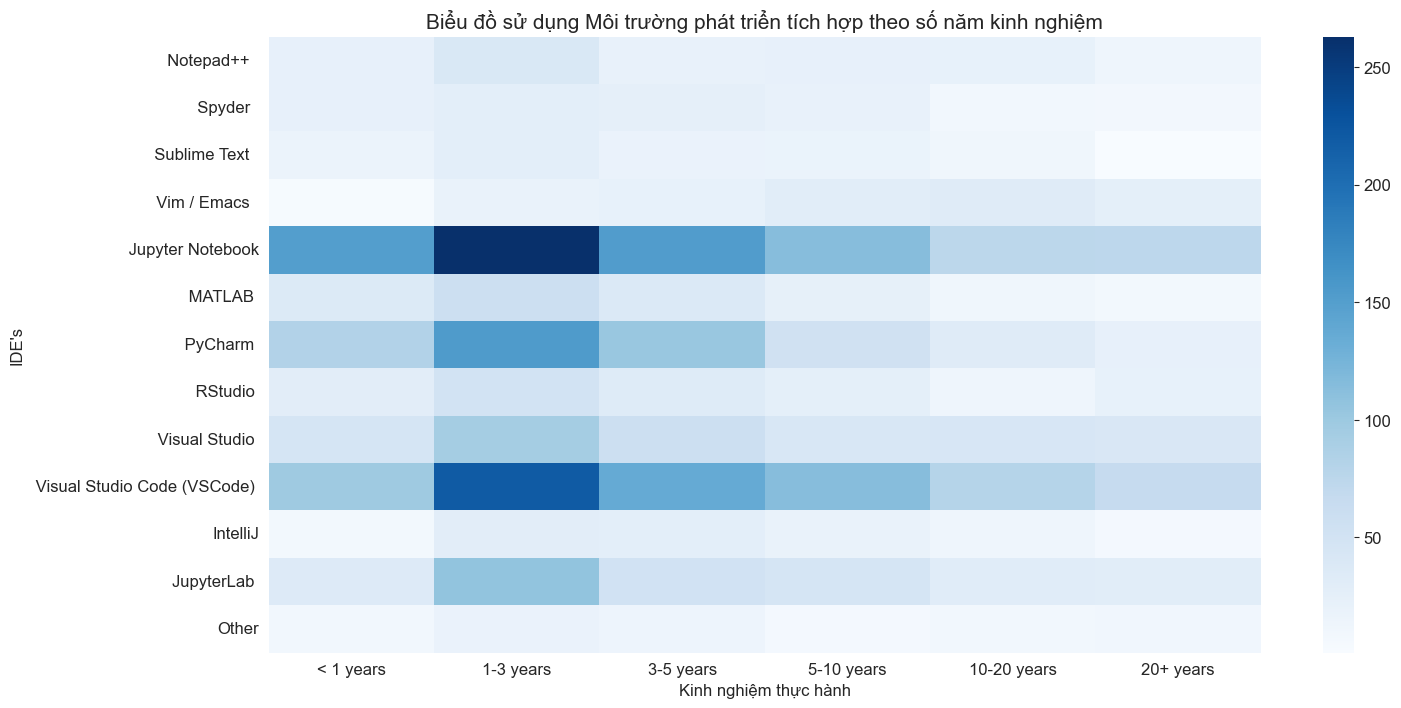

In [39]:
#Vẽ biểu đồ
exp_pivot = exp_count.pivot(index='Which of the following integrated development environments (IDE\'s) do you use on a regular basis?', 
columns='For how many years have you been writing code and/or programming?', 
values=  'Freq')
exp_pivot

plt.subplots(figsize=(16,8))
ax = sns.heatmap(exp_pivot, cmap='Blues')
ax.set(xlabel="Kinh nghiệm thực hành", ylabel= "IDE's")
plt.title("Biểu đồ sử dụng Môi trường phát triển tích hợp theo số năm kinh nghiệm", fontsize=15)

- _Lựa chọn biểu đồ_: Heatmap  
    - Trực quan hóa mức độ tương quan: Heatmap là một công cụ mạnh mẽ để hiển thị mức độ tương quan giữa các biến trong một ma trận hoặc bảng dữ liệu. Bằng cách sử dụng màu sắc, heatmap có thể nhanh chóng và dễ hiểu cho thấy sự khác biệt và mối quan hệ giữa các giá trị.
    - Đánh giá định lượng và sự phân bố: Heatmap cung cấp một cách hiệu quả để đánh giá định lượng và phân bố của dữ liệu trong một ma trận. Bằng cách sử dụng màu sắc, heatmap giúp người dùng nhìn nhận sự khác biệt và tương quan giữa các giá trị dễ dàng hơn so với việc sử dụng bảng dữ liệu thông thường.
    - Dễ tạo và trực quan: Heatmap có thể được tạo nhanh chóng bằng sử dụng các thư viện trực quan hóa dữ liệu như Matplotlib, Seaborn hoặc Plotly. Chúng cung cấp các phương thức và hàm dễ sử dụng để tạo và tùy chỉnh biểu đồ heatmap. Đồng thời, heatmap có một cấu trúc trực quan, giúp người dùng dễ dàng hiểu và phân tích dữ liệu.
    - Phát hiện mẫu và xu hướng: Heatmap có khả năng tạo ra sự nhấn mạnh và phát hiện mẫu và xu hướng trong dữ liệu. Khi các giá trị cao hoặc thấp được đại diện bằng các màu tương ứng, người dùng có thể nhanh chóng nhận biết những phần tử nổi bật và sự phân bố của chúng trong biểu đồ.
    

- _Phân tích_:  
    - Biểu đồ trên thể hiện sự phân bố việc sử dụng công cụ IDE theo kinh nghiệm lập trình của người được khảo sát.
    - Ta có thể thấy Jupyter Notebook và VSCode là 2 dải màu nổi nhất trong biểu đồ, điều này cho thấy tính ưa chuộng của phần lớn lập trình viên 4 nước châu Á (Trung Quốc, Việt Nam, Hàn Quốc, Nhật Bản) đối với 2 ứng dụng này và cũng cho thấy sự bền bỉ, chất lượng khi có sự phổ biến mạnh mẽ trong từng nhóm kinh nghiệm.
    - Các ứng dụng IDE có dải màu nổi bật tiếp theo là Visual Studio và Pycharm, tuy kém phổ biến hơn 2 ứng dụng trên nhưng cũng là lựa chọn hàng đầu của các lập trình viên, đặc biệt trong nhóm kinh nghiệm 10 năm trở xuống.
    - Các IDE còn lại đều có người sử dụng nhưng sẽ được dùng trong lĩnh vực, tình huống nhất định nên khả năng hấp dẫn kém hơn so với các IDE trên.

Tóm lại, tùy theo kinh nghiệm cá nhân và tình huống sử dụng mà lập trình viên, người dùng sẽ chọn IDE phù hợp cho công việc của mình. Nhưng các IDE sau vẫn sẽ là sự lựa chọn hàng đầu của các lập trình viên: Jupyter Notebook, VSCode.

<h1>KHẢO SÁT VỀ DATA SCIENCE TẠI VIỆT NAM 2022</h1>

Lọc dữ liệu những người khảo sát tại Việt Nam

In [40]:
vn_df = df.loc[df['In which country do you currently reside?'] == 'Viet Nam' ]
vn_df.head(5)

,Duration,What is your age (# years)?,What is your gender?,In which country do you currently reside?,Are you currently a student?,On which platforms have you begun or completed data science courses?,What products or platforms did you find to be most helpful when you first started studying data science?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Do you use any of the following hosted notebook products?,Do you use any of the following data visualization libraries on a regular basis?,For how many years have you used machine learning methods?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Do you download pre-trained model weights from any of the following services?,Who/what are your favorite media sources that report on data science topics?
8,512,40-44,Man,Viet Nam,Yes,(Cloud-certification programs (direct from AWS...,"(University courses, Kaggle (notebooks, compet...",Doctoral degree,10-20 years,"(Python, SQL, C#, C++, Javascript, MATLAB)","(JupyterLab , Visual Studio , Visual Studio ...","( Kaggle Notebooks, Colab Notebooks, Azure Not...","( Matplotlib , Ggplot / ggplot2 , Geoplotlib...",5-10 years,"( Scikit-learn , TensorFlow , Keras , PyT...","(Linear or Logistic Regression, Decision Trees...","( TensorFlow Hub , PyTorch Hub , NVIDIA NGC...","(Kaggle (notebooks, forums, etc), Course Forum..."
9,380,18-21,Man,Viet Nam,Yes,"(None,)","(University courses, Online courses (Coursera,...",Some college/university study without earning ...,< 1 years,"(Python, SQL)","( Visual Studio Code (VSCode) , PyCharm , Ju...","(None,)","( Matplotlib , Seaborn )",I do not use machine learning methods,NaN,NaN,NaN,"(Kaggle (notebooks, forums, etc), YouTube (Kag..."
26,174,22-24,Woman,Viet Nam,Yes,"(LinkedIn Learning,)","(Online courses (Coursera, EdX, etc),)",Bachelor’s degree,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(Email newsletters (Data Elixir, O'Reilly Data..."
32,505,22-24,Man,Viet Nam,No,"(Coursera, Kaggle Learn Courses, Fast.ai, Udac...","(Online courses (Coursera, EdX, etc), Video pl...",Bachelor’s degree,1-3 years,"(Python,)","(JupyterLab , Visual Studio Code (VSCode) , ...","( Kaggle Notebooks, Amazon Sagemaker Studio L...","( Matplotlib , Ggplot / ggplot2 )",Under 1 year,"( Scikit-learn , TensorFlow , Keras , PyT...","(Decision Trees or Random Forests, Gradient Bo...","( TensorFlow Hub ,)","(Twitter (data science influencers), Reddit (r..."
35,1163,18-21,Man,Viet Nam,Yes,"(None,)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
count = vn_df.shape[1]

<h3>1. Khảo sát về nền tảng người khảo sát tại Việt Nam cảm thấy hữu ích nhất khi mới bắt đầu học Data Science</h3>

### 1.1. Tổng quát
##### Lọc ra cột có liên quan để thực hiện phân tích

In [42]:
vn_df_platform = vn_df['What products or platforms did you find to be most helpful when you first started studying data science?'].explode().value_counts().to_dict()

##### Xoá đi những giá trị không giúp ích cho phân tích, ở đây là 'None / I do not study data science'

In [43]:
del vn_df_platform['None / I do not study data science']

Trực quan bằng biểu đồ cột

Text(0.0, 1.0, 'Nền tảng hữu ích khi mới bắt đầu học Data Science')

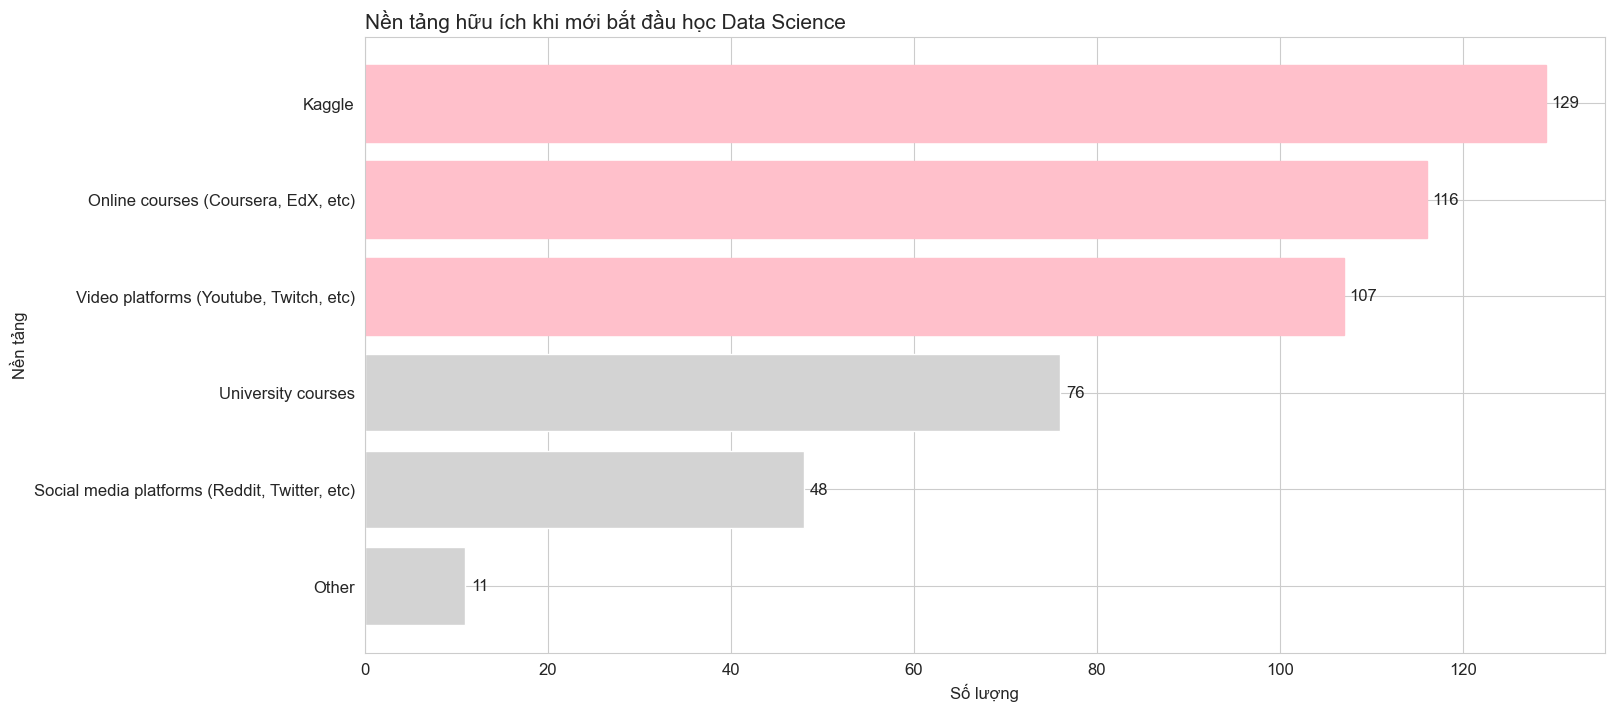

In [44]:
# x = platforms: Các nền tảng / ứng dụng được sử dụng khi mới bắt đầu học Data Science bởi người khảo sát tại Việt Nam
# y = platforms_value: Số lượng người sử dụng tương ứng

platforms = ['Kaggle', 'Online courses (Coursera, EdX, etc)', 
             'Video platforms (Youtube, Twitch, etc)',
             'University courses',
             'Social media platforms (Reddit, Twitter, etc)',
             'Other']

platforms_value = []
for i in vn_df_platform:
    platforms_value.append(vn_df_platform[i])

# Tạo biểu đồ cột ngang

plt.figure(figsize=(16, 8))
platform_plot = plt.barh(platforms, platforms_value, color="lightgrey")

# Đảo ngược trục y để các nền tảng có số người chọn nhiều nhất nằm ở phía trên

ax = plt.gca()
ax.invert_yaxis()
ax.bar_label(platform_plot, padding=4)

# Đặt top 3 nền tảng có số người chọn nhiều nhất màu hồng để làm nổi bật

for i in range (0,3):
    ax.get_children()[i].set_color("pink")

# Đặt tên cho trục x, trục y và tên biểu đồ

ax.set_ylabel("Nền tảng")
ax.set_xlabel("Số lượng")
plt.title("Nền tảng hữu ích khi mới bắt đầu học Data Science", loc="left", fontsize=15)

##### Phân tích

Qua biểu đồ cho thấy:
- Kaggle là nền tảng được lựa chọn hữu ích nhất khi mới bắt đầu học Data Science bởi những người khảo sát đang sinh sống tại Việt Nam với 129 lượt chọn. Tiếp đến là các khoá học online như Coursera, EdX,... với 116 lượt chọn. Thứ ba là các nền tảng xem video trực tuyến như Youtube, Twitch,... với 107 lượt chọn.
- Có thể thấy các nền tảng học online nổi tiếng, có uy tín là sự lựa chọn hàng đầu đối với những người khảo sát tại Việt Nam (Kaggle, Coursera, EdX). Những nền tảng này có những bài giảng về Data Science bài bản, chuyên nghiệp, đầu tư, có thể chia sẻ kiến thức với nhiều người ở khắp mọi nơi trên thế giới, cung cấp chứng chỉ online đảm bảo kiến thức, là một trong những yếu tố được các công ty xem xét. Kaggle còn là nơi lưu trữ rất nhiều dữ liệu, được kiểm tra và đảm bảo tin cậy, có thể sử dụng để thực hành các dự án về Data Science.
- Nằm trong thời đại internet phát triển rộng rãi, không quá bất ngờ khi những nền tảng online là những lựa chọn nhiều nhất khi mới bắt đầu học Data Science. Các nền tảng online mang lại sự thuận tiện cho người học, có thể học bất cứ lúc nào, bất cứ đâu, có thể xem lại bài giảng, trao đổi online,... Các khoá học tại trường đại học chỉ xếp thứ 4 với 76 lượt chọn.

### 1.2. Khảo sát phân chia theo nhóm học sinh/sinh viên và nhóm không phải
##### Lọc ra cột có liên quan để thực hiện phân tích

In [45]:
vn_df_student = vn_df[['Are you currently a student?', 'What products or platforms did you find to be most helpful when you first started studying data science?']].dropna()

In [46]:
is_student = vn_df_student['Are you currently a student?'].unique()
is_student

array(['Yes', 'No'], dtype=object)

Đếm các nền tảng xuất hiện và nhóm theo người khảo sát là/không là học sinh tại thời điểm khảo sát

In [47]:
student_count = vn_df_student.explode('What products or platforms did you find to be most helpful when you first started studying data science?').value_counts().reset_index(name='Freq')
student_count.drop(student_count[student_count['What products or platforms did you find to be most helpful when you first started studying data science?'] == 'None / I do not study data science'].index, inplace = True)
student_count

,Are you currently a student?,What products or platforms did you find to be most helpful when you first started studying data science?,Freq
0,Yes,"Kaggle (notebooks, competitions, etc)",84
1,Yes,"Video platforms (YouTube, Twitch, etc)",73
2,Yes,"Online courses (Coursera, EdX, etc)",71
3,Yes,University courses,56
4,No,"Kaggle (notebooks, competitions, etc)",45
5,No,"Online courses (Coursera, EdX, etc)",45
6,No,"Video platforms (YouTube, Twitch, etc)",34
7,Yes,"Social media platforms (Reddit, Twitter, etc)",31
8,No,University courses,20
9,No,"Social media platforms (Reddit, Twitter, etc)",17


##### Trực quan bằng biểu đồ cột

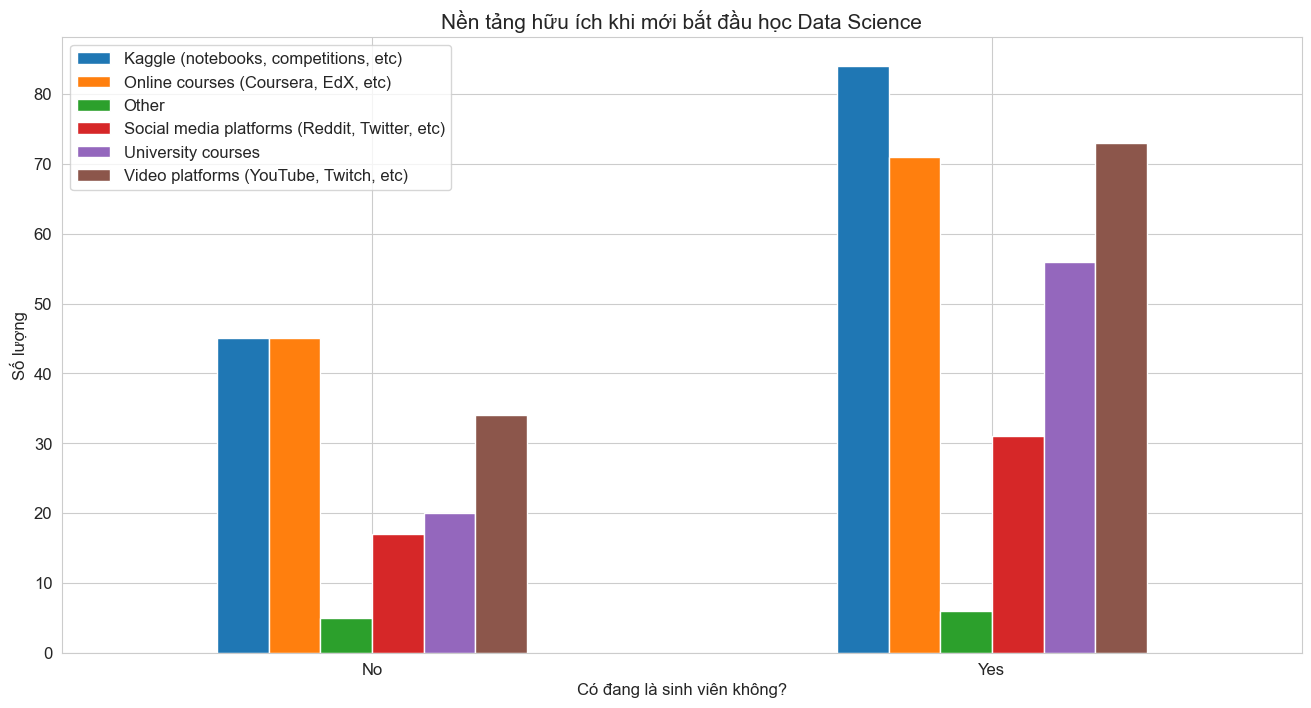

In [48]:
student_count.pivot_table('Freq', 'Are you currently a student?', 'What products or platforms did you find to be most helpful when you first started studying data science?').plot(kind='bar', figsize=(16,8))

# Đặt tên cho trục x, trục y và tên biểu đồ
ax = plt.subplot()
ax.set_ylabel("Số lượng")
ax.set_xlabel("Có đang là sinh viên không?")

plt.xticks(rotation=0)
plt.title("Nền tảng hữu ích khi mới bắt đầu học Data Science", fontsize=15)
plt.rc('font', size=12)
plt.legend()

Text(0.5, 1.0, 'Nền tảng hữu ích khi mới bắt đầu học Data Science')

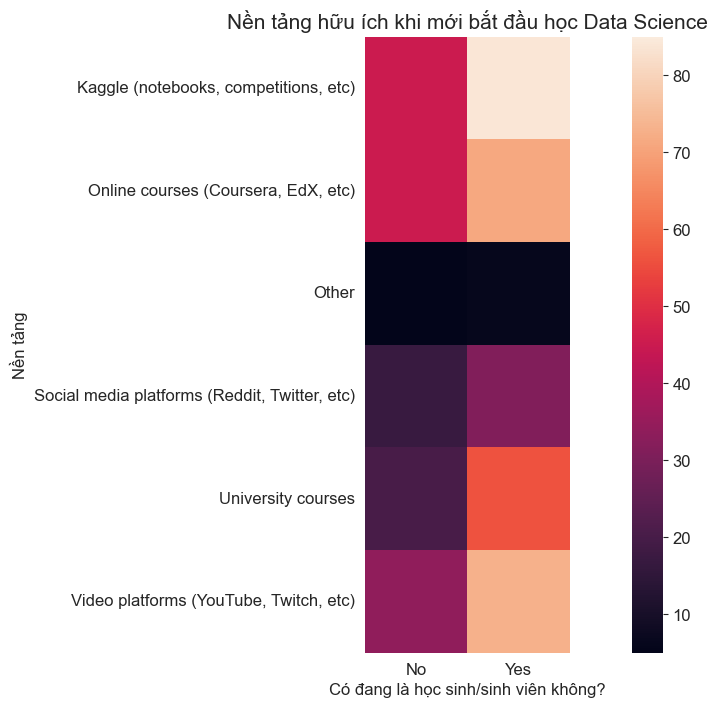

In [49]:
student_pivot = student_count.pivot('What products or platforms did you find to be most helpful when you first started studying data science?', 'Are you currently a student?', 'Freq')
student_pivot

plt.subplots(figsize=(16,8))
ax = sns.heatmap(student_pivot, square=True, vmin=5, vmax=85)
ax.set(xlabel="Có đang là học sinh/sinh viên không?", ylabel= "Nền tảng")
plt.title("Nền tảng hữu ích khi mới bắt đầu học Data Science", fontsize=15)

##### Phân tích

Qua biểu đồ cho thấy:
- Không có sự khác biệt nhiều giữa nhóm người đang là học sinh/sinh viên với nhóm người không là học sinh/sinh viên tại Việt Nam khi 3 lựa chọn nền tảng hữu ích khi mới bắt đầu học Data Science là Kaggle, các khoá học online (Coursera, EdX,...) và nền tảng video trực tuyến (YouTube, Twitch,...)
- Các nhóm người khảo sát đều cho rằng học qua các nền tảng trực tuyến chuyên nghiệp, bài bản là một sự lựa chọn hàng đầu. Cũng là nền tảng trực tuyến nhưng các trang mạng xã hội lại nhận được ít sự lựa chọn hơn rất nhiều. 

### 1.3. Khảo sát nền tảng người khảo sát hoàn thành khoá học Data Science

##### Lọc các cột có liên quan để thực hiện phân tích

In [50]:
vn_df_study = vn_df['On which platforms have you begun or completed data science courses?'].dropna()
vn_df_study = vn_df_study.explode().value_counts().to_dict()
del vn_df_study['None']

In [51]:
study_list = list(vn_df_study.keys())
study_list = [x.strip(' ') for x in study_list]

study_count = []
for i in vn_df_study:
    study_count.append(vn_df_study[i])

study_count_per = [round((val/count)*100,2) for val in study_count]

##### Trực quan bằng biểu đồ cột ngang

Text(0.0, 1.0, 'Nền tảng khi mới bắt đầu được sử dụng để hoàn thành khoá học Data Science')

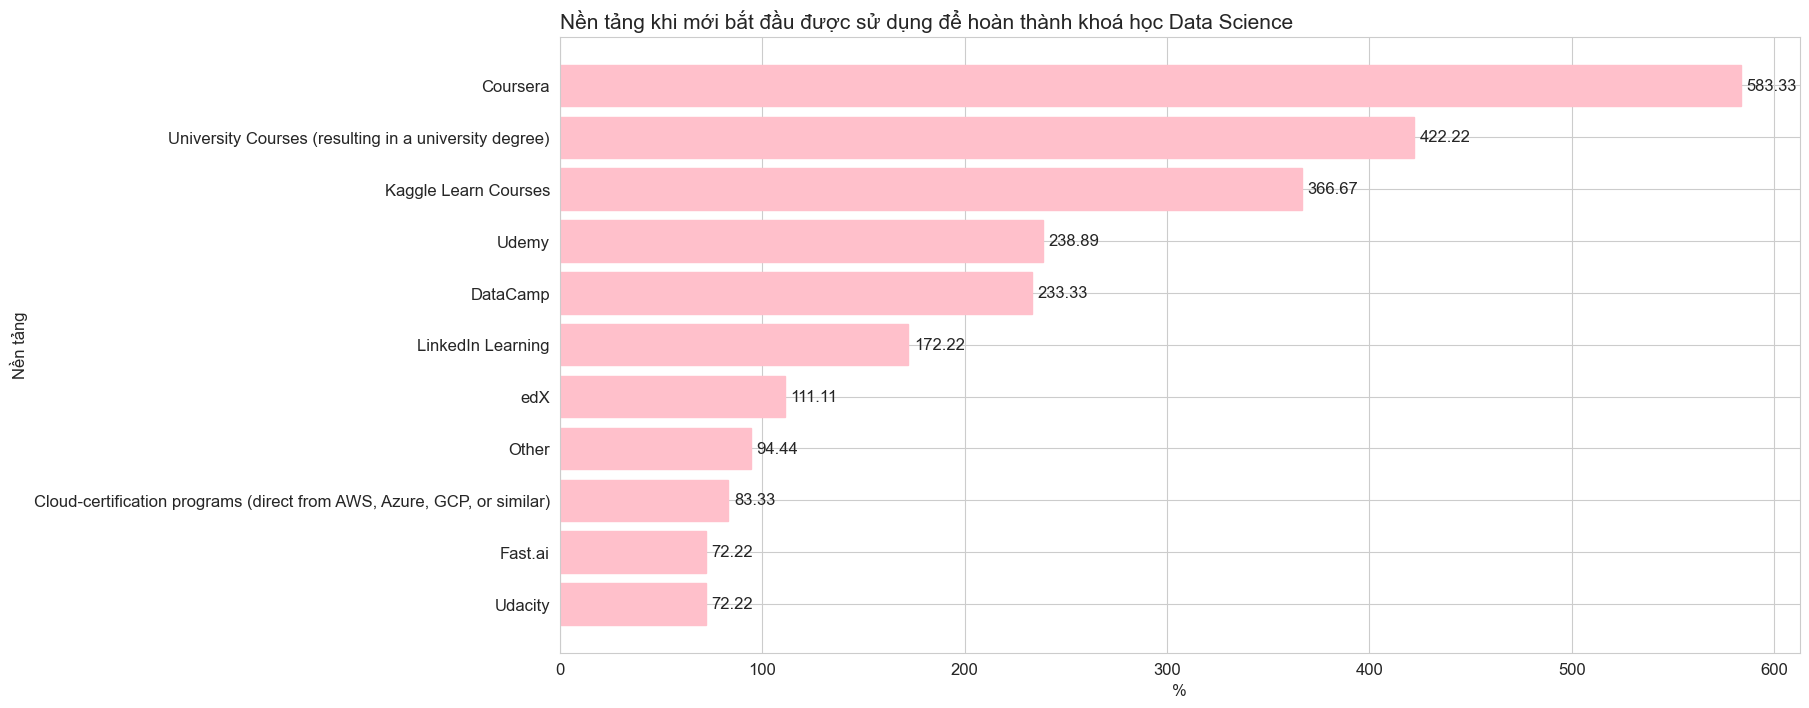

In [52]:
plt.figure(figsize=(16,8))

ide_plot = plt.barh(study_list, study_count_per, color="grey")

# Đảo ngược trục y để các nền tảng có số người chọn nhiều nhất nằm ở phía trên

ax = plt.gca()
ax.invert_yaxis()
ax.bar_label(ide_plot, padding=4)

# Đặt top 3 nền tảng có số người chọn nhiều nhất màu hồng để làm nổi bật

for i in range (0,len(study_list)):
    if study_count_per[i] > 30:
        ax.get_children()[i].set_color("pink")

# Đặt tên cho trục x, trục y và tên biểu đồ

ax.set_ylabel("Nền tảng")
ax.set_xlabel("%")
plt.title("Nền tảng khi mới bắt đầu được sử dụng để hoàn thành khoá học Data Science", loc="left", fontsize=15)

##### Phân tích

Qua biểu đồ có thể thấy:
- Coursera là nền tảng được dùng khi mới bắt đầu để hoàn thành khoá học Data Science nhiều nhất trong khảo sát với 49.53% người khảo sát lựa chọn, tiếp đến là các khoá học tại trường đại học với 35.85%, và thứ 3 là Kaggle Learn Courses với 31.13%
- Nhiều người khảo sát ở đây đã bắt đầu Data Science thông qua Coursera, một nền tảng nổi tiếng. Mặt khác, số người được tiếp cận Data Science thông qua các khoá học tại trường Đại học, hoặc theo học các ngành, chuyên ngành tại trường đại học cũng rất cao. Đây là cách tiếp cận truyền thống, bài bản và chuyên nghiệp.
- Kaggle Learn Courses, Udemy, LinkedIn Learning mặc dù ít được lựa chọn hơn Coursera nhưng đây cũng là những lựa chọn được nhiều người sử dụng để bắt đầu và hoàn thành khoá Data Science. Các chương trình chứng chỉ cloud, Fast.ai, Udacity là những lựa chọn chưa được phổ biến trong số người khảo sát tại Việt Nam.

<h3> 2. Ngôn ngữ lập trình nào thường được sử dụng bởi người được khảo sát? </h3>

##### Lọc ra các cột có liên quan để thực hiện phân tích

In [53]:
vn_df_lang = vn_df['What programming languages do you use on a regular basis?'].dropna()
#count = vn_df_lang.count()
vn_df_lang = vn_df_lang.explode().value_counts().to_dict()

##### Xoá đi giá trị không có ích trong việc phân tích

In [54]:
del vn_df_lang['None']

##### Tính phần trăm các ngôn ngữ được chọn

In [55]:
lang_list = list(vn_df_lang.keys())

lang_list_count = []
for i in vn_df_lang:
    lang_list_count.append(vn_df_lang[i])

total = np.sum(lang_list_count)
lang_list_count_percentage = [round((val/total)*100,2) for val in lang_list_count]

##### Trực quan bằng biểu đồ tròn

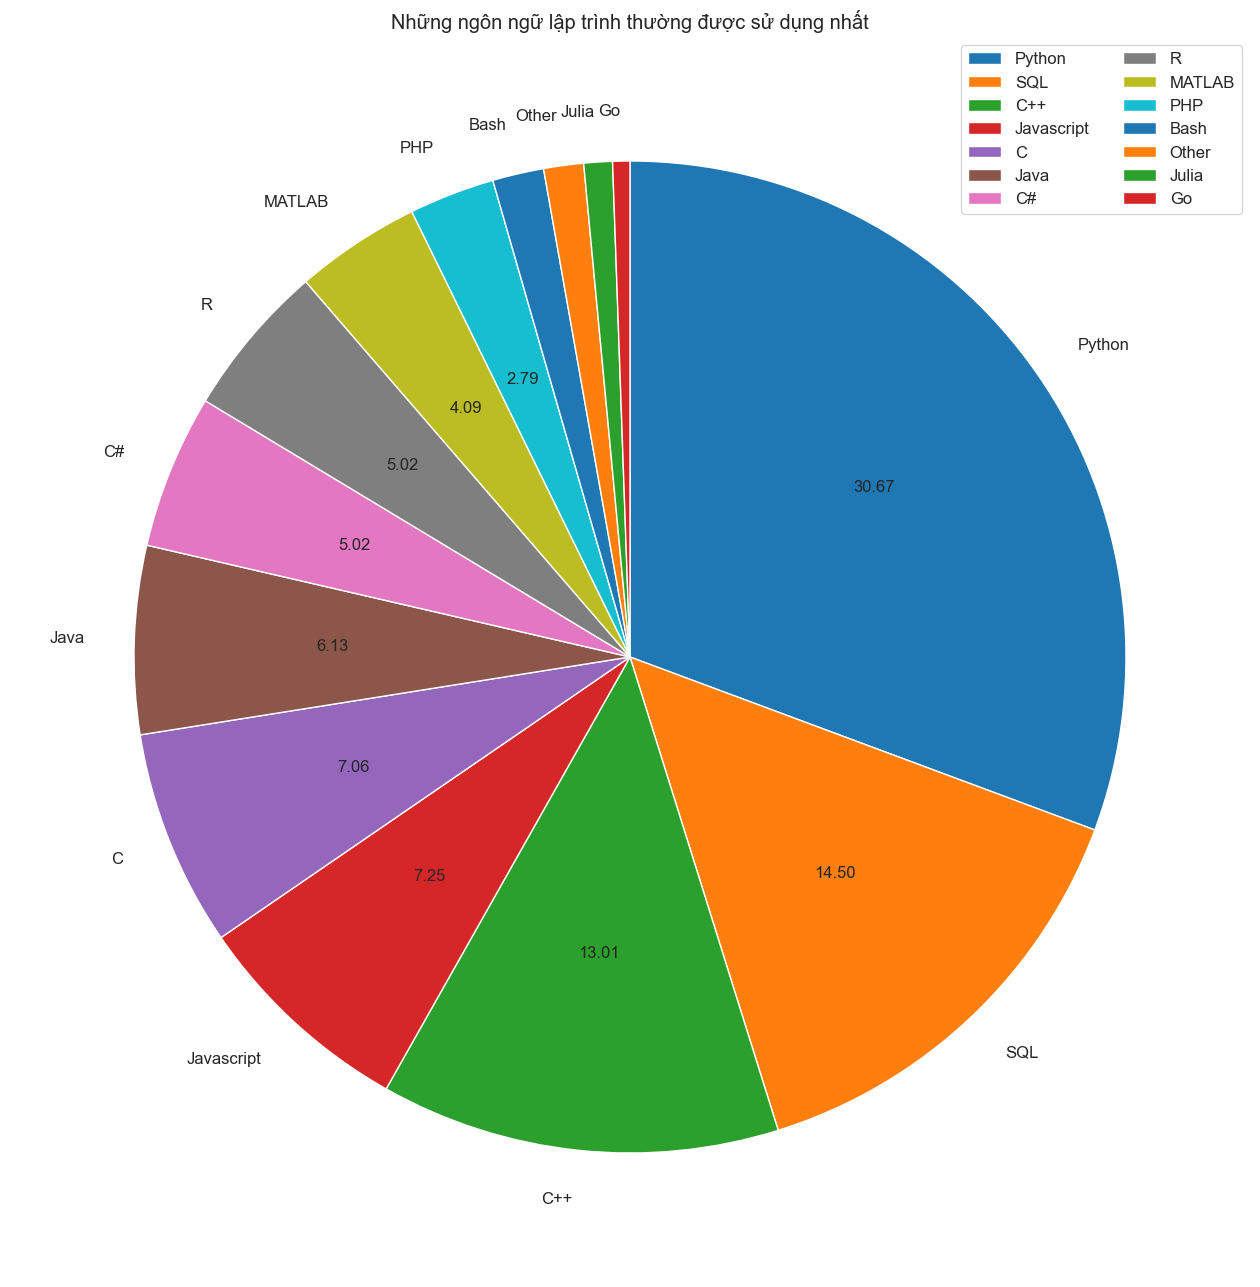

In [56]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 2 else ''

plt.figure(figsize=(16, 24))

plt.pie(lang_list_count_percentage, startangle=90, labels=lang_list, autopct=my_autopct, counterclock=False)
plt.title("Những ngôn ngữ lập trình thường được sử dụng nhất")
plt.legend(ncol=2, loc=1)

##### Tính phần trăm các ngôn ngữ được chọn trên tổng số người khảo sát

In [57]:
lang_list_count_per = [round((val/count)*100,2) for val in lang_list_count]

##### Trực quan bằng biểu đồ cột ngang

Text(0.0, 1.0, 'Những ngôn ngữ lập trình thường được sử dụng nhất')

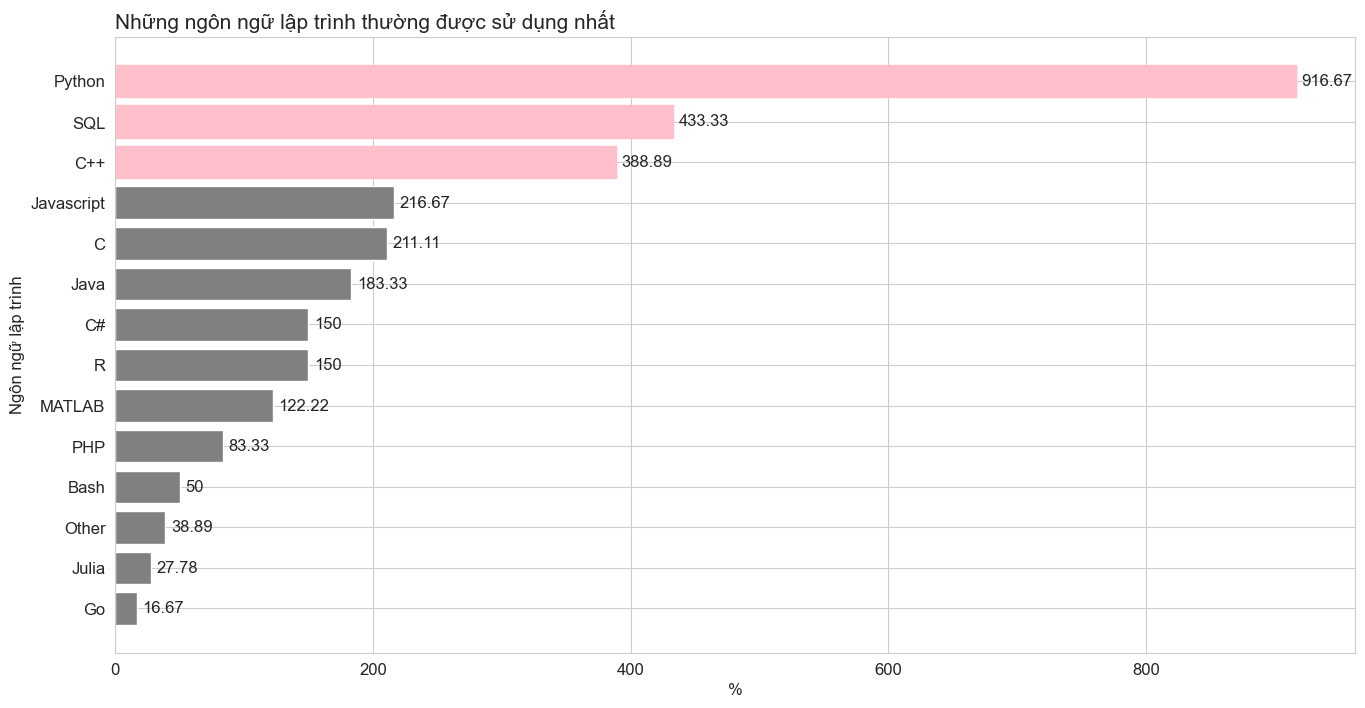

In [58]:
plt.figure(figsize=(16,8))

lang_plot = plt.barh(lang_list, lang_list_count_per, color="grey")

# Đảo ngược trục y để các nền tảng có số người chọn nhiều nhất nằm ở phía trên

ax = plt.gca()
ax.invert_yaxis()
ax.bar_label(lang_plot, padding=4)

# Đặt top 3 nền tảng có số người chọn nhiều nhất màu hồng để làm nổi bật

for i in range (0,3):
    ax.get_children()[i].set_color("pink")

# Đặt tên cho trục x, trục y và tên biểu đồ

ax.set_ylabel("Ngôn ngữ lập trình")
ax.set_xlabel("%")
plt.title("Những ngôn ngữ lập trình thường được sử dụng nhất", loc="left", fontsize=15)

##### Phân tích

Qua biểu đồ cho thấy:
- Python là ngôn ngữ lập trình được nhiều người khảo sát đang sinh sống tại Việt Nam sử dụng thường xuyên nhất. Tiếp đến là SQL và C++.
- Khi nói về Data Science, Python vẫn được nhắc đến nhiều nhất vì tính phổ biến, được sử dụng nhiều và phù hợp với Data Science. SQL cũng là một ngôn ngữ phổ biến được sử dụng để truy vấn dữ liệu,...

<h3> 3. Khảo sát về IDE nào thường được sử dụng </h3>

##### Lọc ra các cột có liên quan để thực hiện phân tích

In [59]:
vn_df_ide = vn_df['Which of the following integrated development environments (IDE\'s) do you use on a regular basis?'].dropna()
vn_df_ide = vn_df_ide.explode().value_counts().to_dict()
del vn_df_ide['None']

In [60]:
ide_list = list(vn_df_ide.keys())
ide_list = [x.strip(' ') for x in ide_list]

ide_count = []
for i in vn_df_ide:
    ide_count.append(vn_df_ide[i])

ide_count_per = [round((val/count)*100,2) for val in ide_count]

##### Trực quan bằng biểu đồ cột ngang

Text(0.0, 1.0, 'IDE thường được sử dụng nhất')

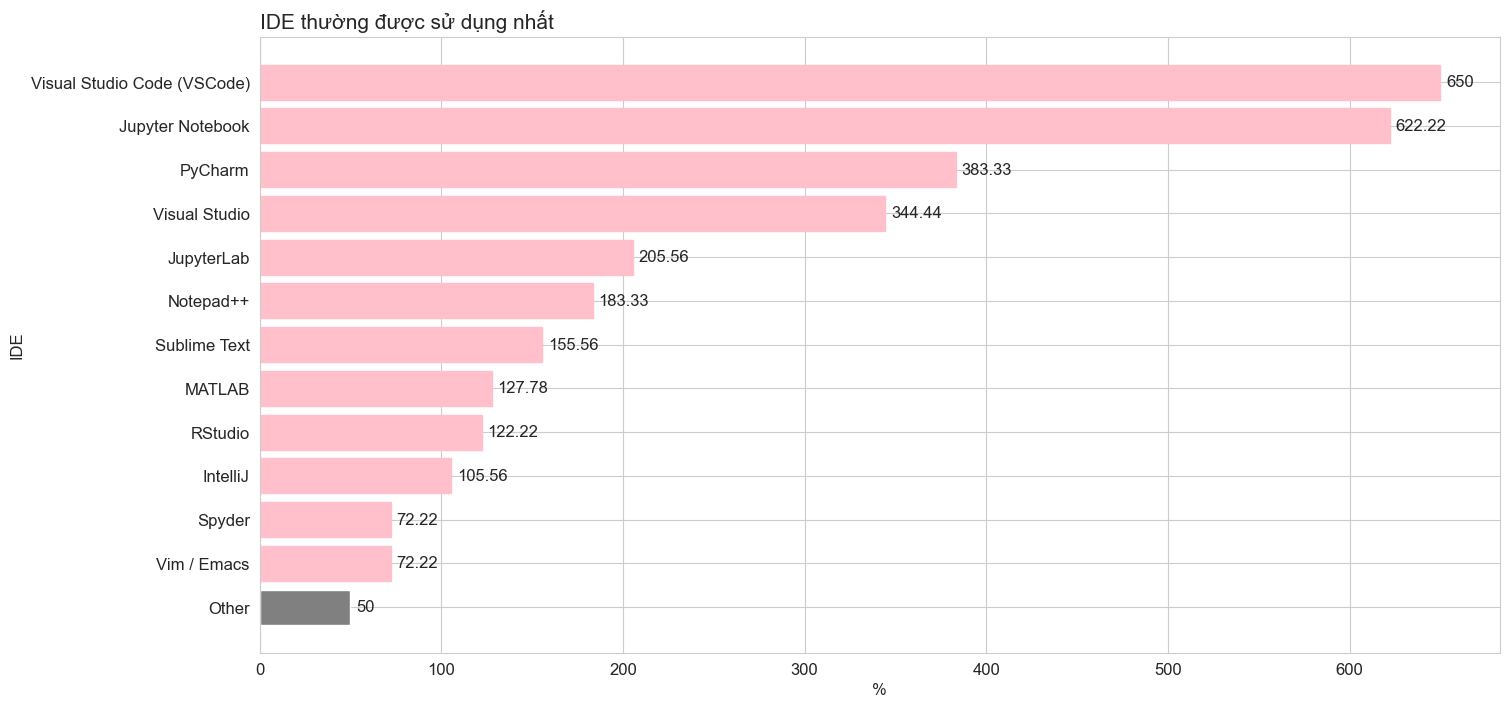

In [61]:
plt.figure(figsize=(16,8))

ide_plot = plt.barh(ide_list, ide_count_per, color="grey")

# Đảo ngược trục y để các nền tảng có số người chọn nhiều nhất nằm ở phía trên

ax = plt.gca()
ax.invert_yaxis()
ax.bar_label(ide_plot, padding=4)

# Đặt top 3 nền tảng có số người chọn nhiều nhất màu hồng để làm nổi bật

for i in range (0,len(ide_list)):
    if ide_count_per[i] > 50:
        ax.get_children()[i].set_color("pink")

# Đặt tên cho trục x, trục y và tên biểu đồ

ax.set_ylabel("IDE")
ax.set_xlabel("%")
plt.title("IDE thường được sử dụng nhất", loc="left", fontsize=15)

##### Phân tích

Qua biểu đồ cho thấy:
- Visual Studio Code và Jupyter Notebook là 2 IDE phổ biến nhất khi thường được sử dụng bởi hơn 50% số người khảo sát tại Việt Nam.
- Vim/Emacs, Spyder, IntelliJ là 3 trong số IDE ít được sử dụng thường xuyên khi chưa đến 10% số người khảo sát lựa chọn.